In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm, binom, expon # normal distribution

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv
walmart_data = pd.read_csv('walmart_data.csv')

--2025-07-03 22:44:12--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.58, 18.164.173.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  --.-KB/s    in 0.1s    

2025-07-03 22:44:12 (180 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



# **Null Values and Outliers**

In [655]:
from IPython.display import Markdown

for i in walmart_data.columns:
  print(i, walmart_data[i].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category 20
Purchase 18105


# **NULL VALUES**

In [656]:
walmart_data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


# **OUTLIERS**

# **Age Group: BOX_PLOT**

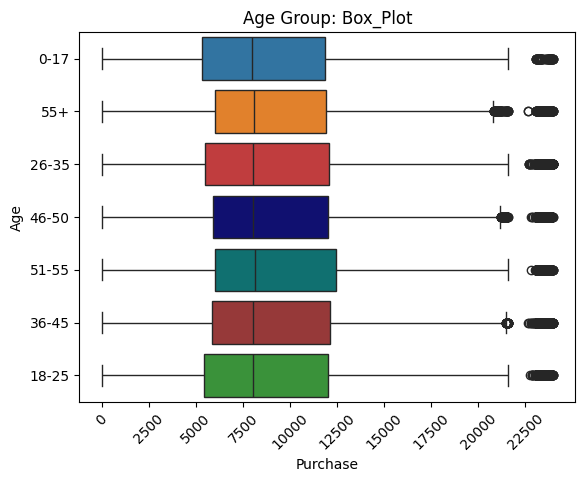

In [657]:
wlmart_a = walmart_data[['Age','Purchase']]
hue_colors = {
    '0-17': '#1f77b4',   # blue
    '55+': '#ff7f0e',   # orange
    '18-25': '#2ca02c',   # green
    '26-35': '#d62728',    # red
    '36-45':'brown',
    '46-50': 'navy',
    '51-55': 'teal'
}
sns.boxplot(y="Age",x="Purchase", data= wlmart_a, hue='Age', palette= hue_colors)
plt.title("Age Group: Box_Plot")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()

# **Gender: BOX_PLOT**

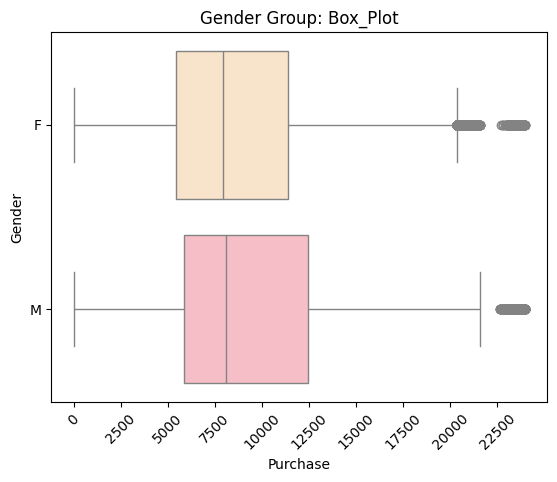

In [658]:
wlmart_g = walmart_data[['Gender','Purchase']]
hue_color = {
    'F': 'bisque',
    'M': 'lightpink',
}
sns.boxplot(y= "Gender", x="Purchase", data= wlmart_g, hue='Gender', palette= hue_color)
plt.title("Gender Group: Box_Plot")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()

# **City_Category: Box_Plot**

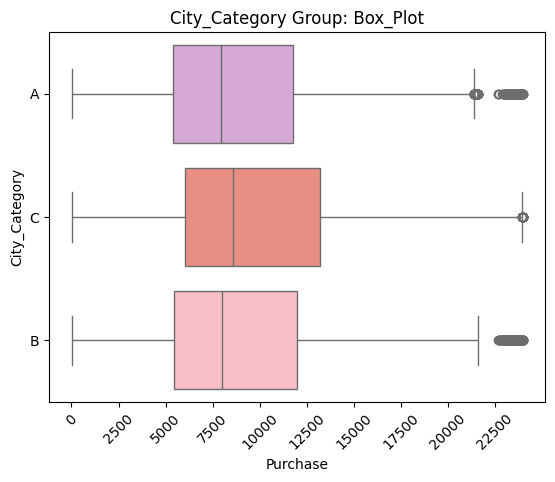

In [659]:
wlmart_city = walmart_data[['City_Category','Purchase']]
hue_color = {
    'A': 'plum',
    'B': 'lightpink',
    'C': 'salmon'
}
sns.boxplot(y= "City_Category", x="Purchase", data= wlmart_city, hue='City_Category', palette= hue_color)
plt.title("City_Category Group: Box_Plot")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()

In [660]:
wlmart_mrt = walmart_data[['Marital_Status','Purchase']]
wlmart_mrt

,Marital_Status,Purchase
0,0,8370
1,0,15200
2,0,1422
3,0,1057
4,0,7969
...,...,...
550063,1,368
550064,0,371
550065,1,137
550066,0,365


# **Clipping of Outliers**

# **Gender Column Outliers**

The minimum and maximum values to keep are:  1984.0 19336.0


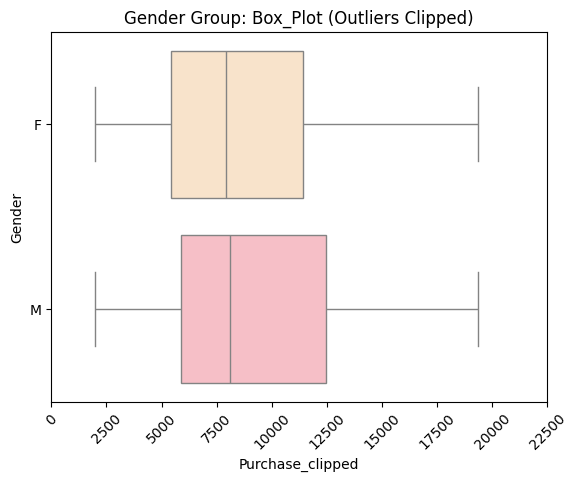

In [661]:
dat = walmart_data[['Gender','Purchase']].copy()
lower = np.percentile(dat['Purchase'], 5)
upper = np.percentile(dat['Purchase'], 95)
print("The minimum and maximum values to keep are: ", lower, upper)
# Apply clipping only to the 'Purchase' column
dat['Purchase_clipped'] = np.clip(dat['Purchase'], lower, upper)

hue_color = {
    'F': 'bisque',
    'M': 'lightpink',
}
sns.boxplot(y= "Gender", x="Purchase_clipped", data= dat, hue='Gender', palette= hue_color)
plt.title("Gender Group: Box_Plot (Outliers Clipped)")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()


# **Age-Group Column Outliers**

The minimum and maximum values to keep are:  1984.0 19336.0


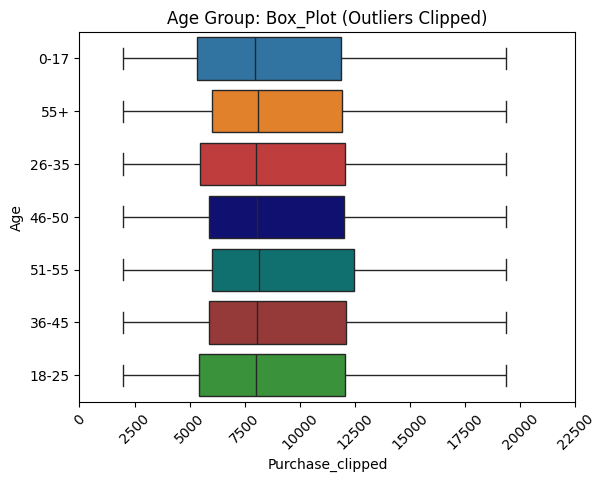

In [662]:
agg = walmart_data[['Age','Purchase']].copy()
low = np.percentile(agg['Purchase'], 5)
upp = np.percentile(agg['Purchase'], 95)
print("The minimum and maximum values to keep are: ", low, upp)
# Apply clipping only to the 'Purchase' column
agg['Purchase_clipped'] = np.clip(agg['Purchase'], low, upp)

hue_colors = {
    '0-17': '#1f77b4',   # blue
    '55+': '#ff7f0e',   # orange
    '18-25': '#2ca02c',   # green
    '26-35': '#d62728',    # red
    '36-45':'brown',
    '46-50': 'navy',
    '51-55': 'teal'
}
sns.boxplot(y= "Age", x="Purchase_clipped", data= agg, hue='Age', palette= hue_colors)
plt.title("Age Group: Box_Plot (Outliers Clipped)")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()

# **City Category Outliers**

The minimum and maximum values to keep are:  1984.0 19336.0


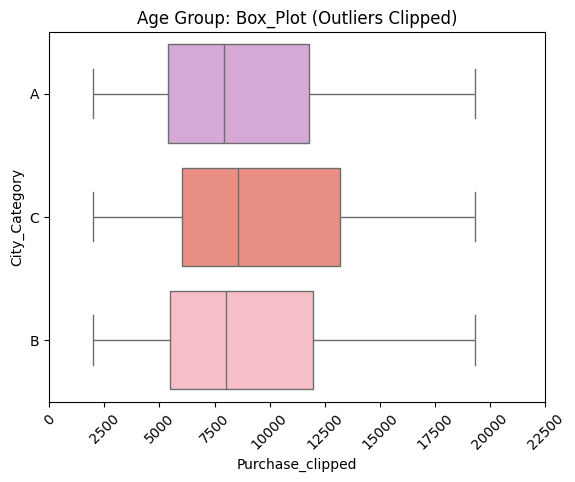

In [663]:
city_out = walmart_data[['City_Category','Purchase']].copy()
city_low = np.percentile(city_out['Purchase'], 5)
city_up = np.percentile(city_out['Purchase'], 95)
print("The minimum and maximum values to keep are: ", city_low, city_up)
# Apply clipping only to the 'Purchase' column
city_out['Purchase_clipped'] = np.clip(city_out['Purchase'], city_low, city_up)

hue_color = {
    'A': 'plum',
    'B': 'lightpink',
    'C': 'salmon'
}
sns.boxplot(y= "City_Category", x="Purchase_clipped", data= city_out, hue='City_Category', palette= hue_color)
plt.title("Age Group: Box_Plot (Outliers Clipped)")
tick_range = np.arange(0, 25000, 2500)
plt.xticks(tick_range)
plt.xticks(rotation=45)
plt.show()

In [664]:
wlmart_g = walmart_data[['Gender','Purchase']]
wlmart_g

,Gender,Purchase
0,F,8370
1,F,15200
2,F,1422
3,F,1057
4,M,7969
...,...,...
550063,M,368
550064,F,371
550065,F,137
550066,F,365


In [665]:
walmart_data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


The data suggests that there are no null values in the walmart dataset across 10 categories.

In [666]:
walmart_data.shape
print('/n')
walmart_data.info()

/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The data depicts that there are 10 columns with 5 object data tyoe and 5 int data type columns. The total number of rows are 550068.

# **Product_ID Count**

In [667]:
walmart_data['Product_ID'].value_counts().reset_index().sort_values(by='count', ascending= False)

,Product_ID,count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3626,P00325342,1
3627,P00312542,1
3628,P00008942,1
3629,P00315142,1


the data shows different product IDs in decreasing order. P00265242 is the highest in number followed by P00025442, P00110742, and P00112142.

In [668]:
walmart_data['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1004991,7
1005391,7
1000094,7


The above data shows that there are 5891 different users with 1001680 purchasing maximum number of products followed by 1004277, 1001941, and 1001181.



In [669]:
walmart_data['Product_Category'].value_counts().reset_index().sort_values(by='count', ascending= False)

,Product_Category,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,6290


The data shows the distribution of product categories in decreasing order of purchase frequency. Product Category 5 has the highest number of purchases, making it the most popular among customers, followed by Category 1 and Category 8. Categories 13, 10 and 12 show moderate engagement, while Categories 19, 14 and 17 have lower purchase counts. Category 9 has the fewest purchases, indicating the least customer interest. This trend reflects overall product popularity and customer preferences

In [670]:
print(walmart_data['Stay_In_Current_City_Years'].value_counts())
print("\n")
print(walmart_data['City_Category'].value_counts())

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


# **Male and Female Population Count**

In [671]:
walmart_Female_purchase =walmart_data [walmart_data['Gender']=='F'][['Gender','Purchase']]
walmart_Male_purchase =walmart_data [walmart_data['Gender']=='M'][['Gender','Purchase']]
print(walmart_Female_purchase.count())
print(walmart_Male_purchase.count())

Gender      135809
Purchase    135809
dtype: int64
Gender      414259
Purchase    414259
dtype: int64


The data shows the number of entries for two different genders (Male and Female) based on purchase records. The Female Gender purchased 135,809 items, while the male has a significantly higher count of 414,259.

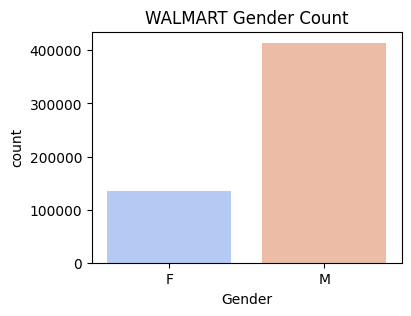

In [672]:
wlmart_Gender = walmart_data['Gender'].value_counts().reset_index()
plt.figure(figsize=(4, 3))
sns.countplot(data= walmart_data, x='Gender', hue='Gender', palette='coolwarm')
plt.title("WALMART Gender Count")
plt.show()

# **Age Group Count**

     Age   count
0  26-35  219587
1  36-45  110013
2  18-25   99660
3  46-50   45701
4  51-55   38501
5    55+   21504
6   0-17   15102


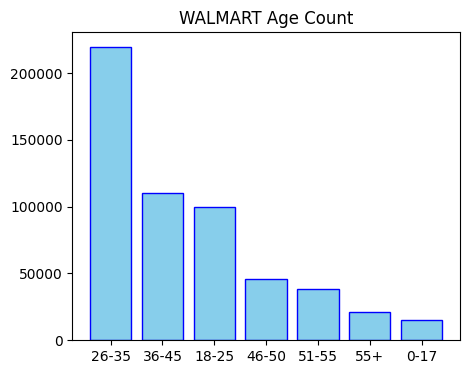

In [673]:
wlmart_age = walmart_data['Age'].value_counts().reset_index()
print(wlmart_age, end='\n')
plt.figure(figsize=(5, 4))
plt.bar(wlmart_age['Age'], wlmart_age['count'], color='skyblue', edgecolor='blue')
plt.title("WALMART Age Count")
plt.show()

The data shows the number of purchases made by different age groups. The **26–35** age group has the highest number of purchases, followed by **36–45** and **18–25**. The **46–50** and **51–55** groups have moderate purchase counts, while the **55+** and **0–17** age groups have the fewest purchases. This suggests that most purchases come from people aged between 18 and 45.


# **City Category Count**

  City_Category   count
0             B  231173
1             C  171175
2             A  147720


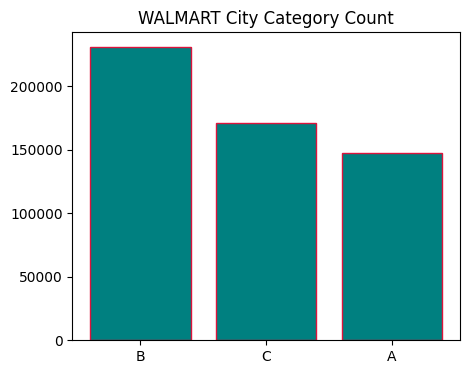

In [674]:
wlmart_cit = walmart_data['City_Category'].value_counts().reset_index()
print(wlmart_cit, end='\n')
plt.figure(figsize=(5, 4))
plt.bar(wlmart_cit['City_Category'], wlmart_cit['count'], color='teal', edgecolor='crimson')
plt.title("WALMART City Category Count")
plt.show()

The data shows the number of purchases made across different city categories. City Category B has the highest number of purchases with 231,173 entries, followed by City Category C with 171,175, and City Category A with 147,720. This suggests that customers from City B are the most active buyers, possibly due to a larger population or greater engagement with the platform.

# **Occupation Count**

    Occupation  count
0            4  72308
1            0  69638
2            7  59133
3            1  47426
4           17  40043
5           20  33562
6           12  31179
7           14  27309
8            2  26588
9           16  25371
10           6  20355
11           3  17650
12          10  12930
13           5  12177
14          15  12165
15          11  11586
16          19   8461
17          13   7728
18          18   6622
19           9   6291
20           8   1546


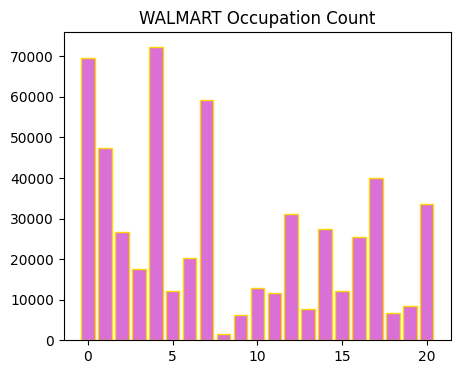

In [675]:
wlmart_occ = walmart_data['Occupation'].value_counts().reset_index()
print(wlmart_occ, end='\n')
plt.figure(figsize=(5, 4))
plt.bar(wlmart_occ['Occupation'], wlmart_occ['count'], color='orchid', edgecolor='gold')
plt.title("WALMART Occupation Count")
plt.show()

The data shows purchase counts across different occupation codes. Occupation 4 has the highest number of purchases, followed by Occupation 0 and Occupation 7, showing they are the most active buyers. Occupation 1 and 17 also have strong purchase activity. As we go down the list, the number of purchases decreases, with Occupations 20, 13, 18, and 9 showing lower activity. Occupation 8 has the fewest purchases, indicating the least engagement.


# **Multivariate Analysis on Age, Marital Status, and the Amount Spent.**





In [676]:
walmart_age_marital_amt= walmart_data.groupby(['Age', 'Marital_Status'])['Purchase'].count().reset_index().sort_values(by='Purchase',ascending= False)
walmart_age_marital_amt

,Age,Marital_Status,Purchase
3,26-35,0,133296
4,26-35,1,86291
1,18-25,0,78544
5,36-45,0,66377
6,36-45,1,43636
8,46-50,1,33011
10,51-55,1,27662
2,18-25,1,21116
0,0-17,0,15102
12,55+,1,13621


The data shows the total number of purchases made by individuals from different age groups, separated by marital status—where **1 represents married** and **0 represents single**. Overall, **single individuals have made more purchases than married individuals** across most age groups.

The **26–35** age group has the highest number of purchases, with **single individuals contributing significantly more (133,296)** compared to **married individuals (86,291)**. Similarly, in the **18–25** group, singles again lead with **78,544 purchases**, while married individuals account for **21,116**. The **36–45** group also follows this trend, where singles made **66,377 purchases** and married individuals made **43,636**.

In older age groups like **46–50**, **51–55**, and **55+**, married individuals tend to make more purchases than singles, but the overall numbers are lower compared to younger groups. For example, in the **46–50** group, married individuals made **33,011 purchases**, while singles made **12,690**.




# **Multivariate Analysis on Age, Marital Status, Gender and the Amount Spent.**

In [677]:
walmart_age_marital_gen= walmart_data.groupby(['Age', 'Marital_Status','Gender'])['Purchase'].count().reset_index().sort_values(by='Purchase',ascending= False)
walmart_age_marital_gen

,Age,Marital_Status,Gender,Purchase
7,26-35,0,M,103218
9,26-35,1,M,65617
3,18-25,0,M,60187
11,36-45,0,M,49728
13,36-45,1,M,33115
6,26-35,0,F,30078
17,46-50,1,M,22978
21,51-55,1,M,21348
8,26-35,1,F,20674
2,18-25,0,F,18357


The data shows that the highest purchase amounts come from single males aged 26–35, followed by married males in the same age group. This reinforces the earlier observation that the 18–35 age range, especially among single individuals, is the most active in terms of spending. Within this group, males consistently contribute more than females, suggesting a gender-based difference in purchasing behavior.
As age increases, the total purchase amounts gradually decline. For instance, males aged 36–45 (both single and married) still show moderate spending, but beyond the age of 45, purchases drop significantly. In older age groups like 46–50, 51–55, and 55+, married individuals—particularly males—make more purchases than their single counterparts, though the overall volume is lower. Female purchases are consistently lower across all age groups, with the lowest figures seen in the 55+ category


# **How does gender affect the amount spent?**

## **Population mean for Males**

Text(0.5, 1.0, 'General Male Distribution')

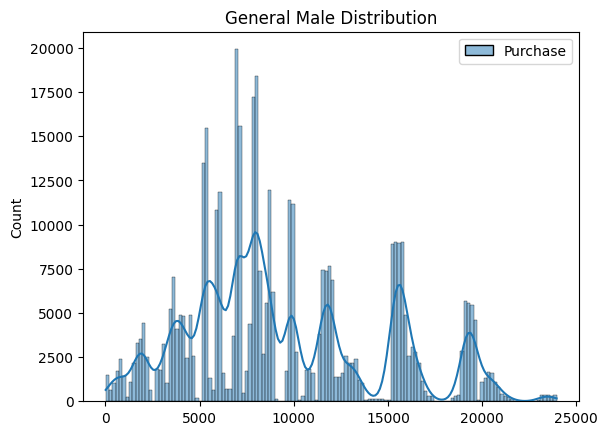

In [678]:
walmart_Male_purchase =walmart_data [walmart_data['Gender']=='M'][['Gender','Purchase']]
True_Male_mean = walmart_Male_purchase.describe()
sns.histplot(walmart_Male_purchase, kde=True)
plt.title("General Male Distribution")

In [679]:
True_Male_mean = walmart_Male_purchase.describe()
True_Male_mean

,Purchase
count,414259.00000
mean,9437.52604
std,5092.18621
min,12.00000
25%,5863.00000
50%,8098.00000
75%,12454.00000
max,23961.00000


##**Confidence Interval (95%) for Total Male Population**

In [680]:
True_Male_confidence= norm.interval(0.95, True_Male_mean.loc['mean'], True_Male_mean.loc['std']/np.sqrt(True_Male_mean.loc['count']))
True_Male_confidence

(array([9422.01944736]), array([9453.03263358]))

# **Sample Mean for Males, n=300**

Mean for 300 sample is: 9445.36936
Standard deviation for 300 sample is: 292.152531864305


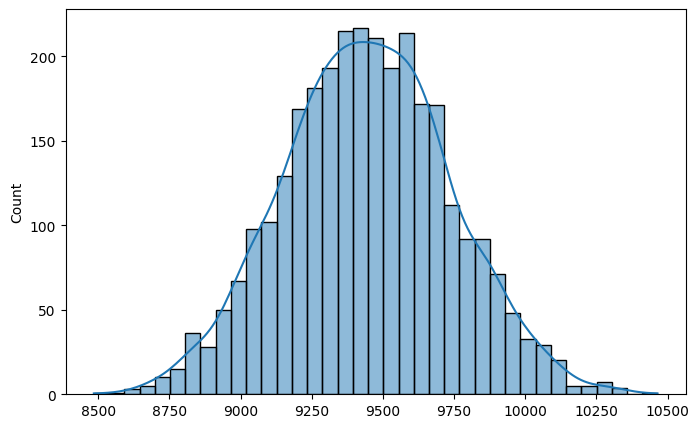

In [681]:
plt.figure(figsize=(8, 5))
sampleM_300 = [np.mean(walmart_Male_purchase['Purchase'].sample(300, replace=True)) for i in range(3000)]
sns.histplot(sampleM_300, kde=True)
print(f"Mean for 300 sample is: {np.mean(sampleM_300)}")
print(f"Standard deviation for 300 sample is: {np.std(sampleM_300)}")

# **Confidence Interval for Sample Male n=300**

In [682]:
Sample_Male300_CI= norm.interval(0.95, np.mean(sampleM_300), np.std(sampleM_300)/np.sqrt(300))
Sample_Male300_CI

(np.float64(9412.309796276812), np.float64(9478.42892372319))

# **Sample Mean for Males, n= 3,000**

Mean for 3,000 sample is: 9439.24253388889
Standard deviation for 3,000 sample is: 93.50479790567314


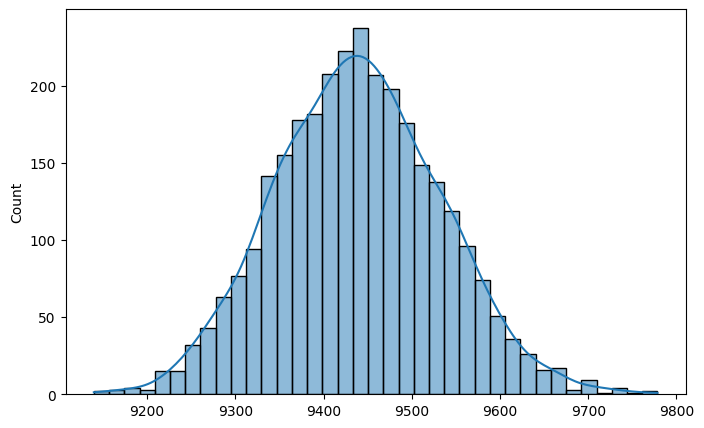

In [683]:
plt.figure(figsize=(8, 5))
sampleM_3000 = [np.mean(walmart_Male_purchase['Purchase'].sample(3000, replace=True)) for i in range(3000)]
sns.histplot(sampleM_3000, kde=True)
print(f"Mean for 3,000 sample is: {np.mean(sampleM_3000)}")
print(f"Standard deviation for 3,000 sample is: {np.std(sampleM_3000)}")

# **Confidence Interval for Sample Male n= 3,000**

In [684]:
Sample_Male3000_CI= norm.interval(0.95, np.mean(sampleM_3000), np.std(sampleM_3000)/np.sqrt(3000))
Sample_Male3000_CI

(np.float64(9435.896569152444), np.float64(9442.588498625335))

# **Sample Mean for Males, n= 30,000**

Mean for 30,000 sample is: 9437.345641822223
Standard deviation for 30,000 sample is: 29.303804535893725


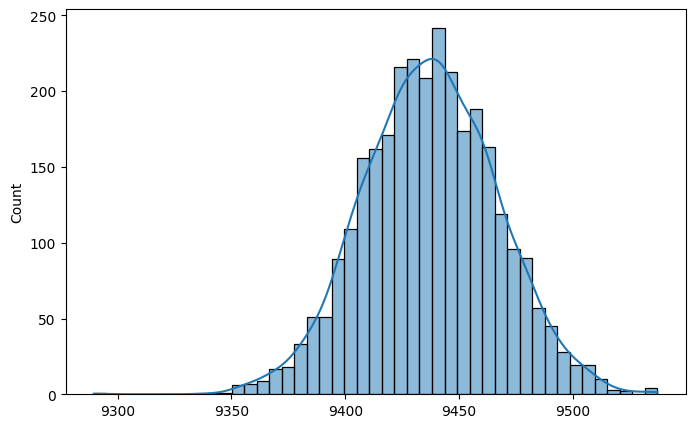

In [685]:
plt.figure(figsize=(8, 5))
sampleM_30000 = [np.mean(walmart_Male_purchase['Purchase'].sample(30000, replace=True)) for i in range(3000)]
sns.histplot(sampleM_30000, kde=True)
print(f"Mean for 30,000 sample is: {np.mean(sampleM_30000)}")
print(f"Standard deviation for 30,000 sample is: {np.std(sampleM_30000)}")

# **Confidence Interval for Sample Male n= 30,000**

In [686]:
Sample_Male30000_CI= norm.interval(0.95, np.mean(sampleM_30000), np.std(sampleM_30000)/np.sqrt(30000))
Sample_Male30000_CI

(np.float64(9437.014044150554), np.float64(9437.677239493893))

# **Comparing Male Confidence Interval, n= 300, 3,000, 30,000**

Text(9435.877239493893, 0.6, 'CI-> n=30,000')

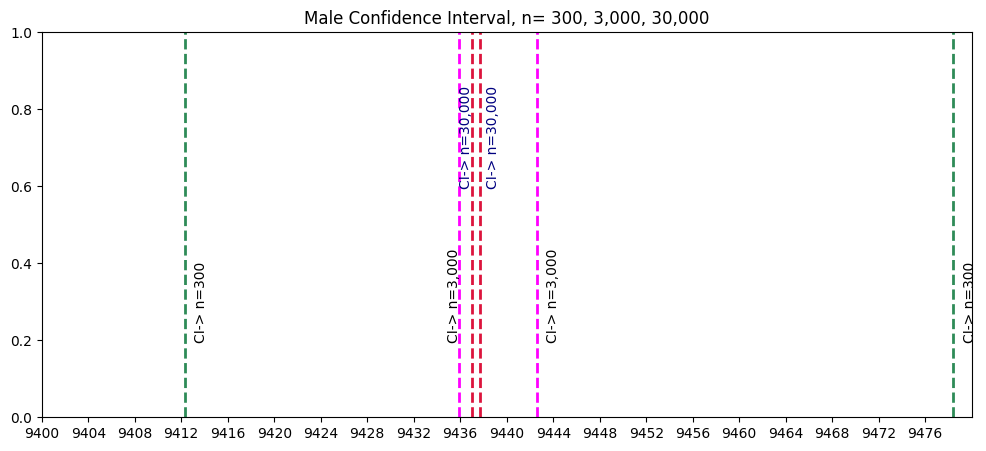

In [687]:
plt.figure(figsize=(12, 5))

plt.title("Male Confidence Interval, n= 300, 3,000, 30,000")
plt.xlim(9400, 9480)
tick_ran = np.arange(9400, 9480, 4)
plt.xticks(tick_ran)
plt.axvline(x=Sample_Male300_CI[0], color='seagreen', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Male300_CI[1], color='seagreen', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=Sample_Male3000_CI[0], color='fuchsia', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Male3000_CI[1], color='fuchsia', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=Sample_Male30000_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Male30000_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.text(Sample_Male300_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=300', color='black', rotation=90)
plt.text(Sample_Male300_CI[1]+ .8, plt.ylim()[1]*0.2, 'CI-> n=300', color='black', rotation=90)

plt.text(Sample_Male3000_CI[0]- 1, plt.ylim()[1]*0.2, 'CI-> n=3,000', color='black', rotation=90)
plt.text(Sample_Male3000_CI[1]+ .8, plt.ylim()[1]*0.2, 'CI-> n=3,000', color='black', rotation=90)

plt.text(Sample_Male30000_CI[0]+1.2, plt.ylim()[1]*0.6, 'CI-> n=30,000', color='navy', rotation=90)
plt.text(Sample_Male30000_CI[1]-1.8, plt.ylim()[1]*0.6, 'CI-> n=30,000', color='navy', rotation=90)

In [688]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Male Gender \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {Sample_Male300_CI[0]}           {Sample_Male300_CI[1]}")
print(f"  n= 3,000       {Sample_Male3000_CI[0]}          {Sample_Male3000_CI[1]}")
print(f"  n= 30,000      {Sample_Male30000_CI[0]}           {Sample_Male30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Male Gender 
 Value of N:     Lower CI                     Upper CI 
  n= 300         9412.309796276812           9478.42892372319
  n= 3,000       9435.896569152444          9442.588498625335
  n= 30,000      9437.014044150554           9437.677239493893


# **MALE CI COMPARISON: BOOTSTRAP METHOD**
**All 3 confidence intervals (CI) overlap, which means the average purchase amount for Men is consistent across different sample sizes.**

As the sample size increases, the confidence interval becomes narrower:

At n = 300, the interval is wide, giving more uncertainty.

At n = 30,000, the interval is very narrow best accuracy.
The average purchase amount for males is likely around 9437, since all intervals center near this value.
This shows that larger samples give more reliable and stable estimates.
The bootstrap method works well, giving similar results across different sample sizes.


# **Female Gender Population**

In [689]:
walmart_Female_purchase = walmart_data [walmart_data['Gender']=='F'][['Gender','Purchase']]
walmart_Female_purchase

,Gender,Purchase
0,F,8370
1,F,15200
2,F,1422
3,F,1057
14,F,5378
...,...,...
550061,F,599
550064,F,371
550065,F,137
550066,F,365


# **Population mean for Females**

Text(0.5, 1.0, 'General Female Distribution')

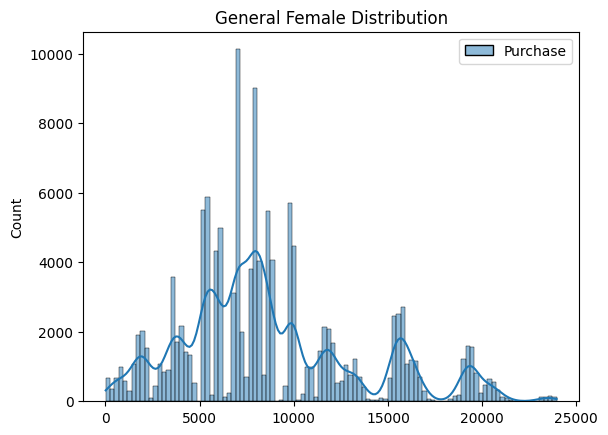

In [690]:
walmart_Female_purchase =walmart_data [walmart_data['Gender']=='F'][['Gender','Purchase']]
True_Female_mean = walmart_Female_purchase.describe()
sns.histplot(walmart_Female_purchase, kde=True)
plt.title("General Female Distribution")

# **Sample Mean for Females, n=300**

In [691]:
True_Female_mean = walmart_Female_purchase.describe()
True_Female_mean

,Purchase
count,135809.000000
mean,8734.565765
std,4767.233289
min,12.000000
25%,5433.000000
50%,7914.000000
75%,11400.000000
max,23959.000000


#**Confidence Interval (95%) for Total Female Population**

In [692]:
True_Female_confidence= norm.interval(0.95, True_Female_mean.loc['mean'], True_Female_mean.loc['std']/np.sqrt(True_Female_mean.loc['count']))
True_Female_confidence

(array([8709.21154714]), array([8759.91998317]))

# **Sample Mean for Females, n=300**

Sameple Mean (Females) for 300 sample is: 8743.201771666665
Sample Standard deviation (Females) for 300 sample is: 278.6497000666091


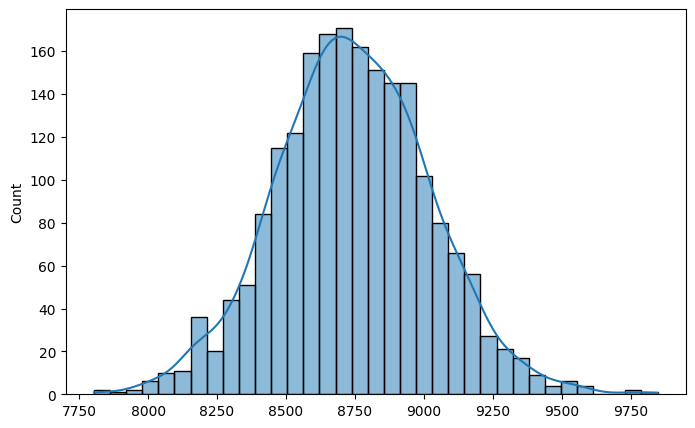

In [693]:
plt.figure(figsize=(8, 5))
sampleF_300 = [np.mean(walmart_Female_purchase['Purchase'].sample(300, replace=True)) for i in range(2000)]
sns.histplot(sampleF_300, kde=True)
print(f"Sameple Mean (Females) for 300 sample is: {np.mean(sampleF_300)}")
print(f"Sample Standard deviation (Females) for 300 sample is: {np.std(sampleF_300)}")

# **Confidence Interval for Sample Female n= 300**

In [694]:
Sample_Female300_CI= norm.interval(0.95, np.mean(sampleF_300), np.std(sampleF_300)/np.sqrt(300))
Sample_Female300_CI

(np.float64(8711.670169126668), np.float64(8774.733374206662))

# **Sample Mean for Females, n= 3,000**

Sameple Mean (Females) for 3000 sample is: 8733.773227666667
Sample Standard deviation (Females) for 3000 sample is: 86.63102483849505


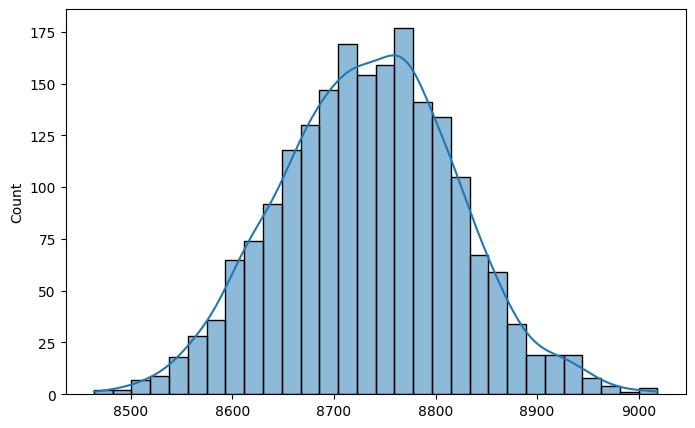

In [695]:
plt.figure(figsize=(8, 5))
sampleF_3000 = [np.mean(walmart_Female_purchase['Purchase'].sample(3000, replace=True)) for i in range(2000)]
sns.histplot(sampleF_3000, kde=True)
print(f"Sameple Mean (Females) for 3000 sample is: {np.mean(sampleF_3000)}")
print(f"Sample Standard deviation (Females) for 3000 sample is: {np.std(sampleF_3000)}")

# **Confidence Interval for Sample Mean of Females, n=3000**

In [696]:
Sample_Female3000_CI= norm.interval(0.95, np.mean(sampleF_3000), np.std(sampleF_3000)/np.sqrt(3000))
Sample_Female3000_CI

(np.float64(8730.673233220561), np.float64(8736.873222112772))

# **Sample Mean for Females, n= 30,000**

Sameple Mean (Females) for 30,000 sample is: 8734.863397233334
Sample Standard deviation (Females) for 30,000 sample is: 27.678285677578405


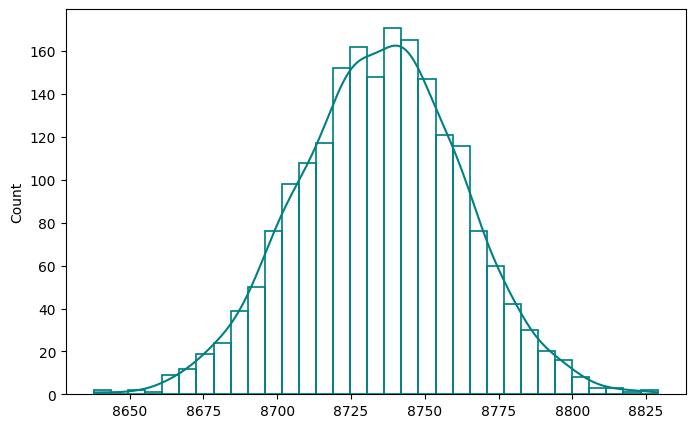

In [697]:
plt.figure(figsize=(8, 5))
sampleF_30000 = [np.mean(walmart_Female_purchase['Purchase'].sample(30000, replace=True)) for i in range(2000)]
sns.histplot(sampleF_30000, kde=True, color='teal', fill= False)
print(f"Sameple Mean (Females) for 30,000 sample is: {np.mean(sampleF_30000)}")
print(f"Sample Standard deviation (Females) for 30,000 sample is: {np.std(sampleF_30000)}")

# **Confidence Interval for Sample Mean of Females, n= 30,000**

In [698]:
Sample_Female30000_CI= norm.interval(0.95, np.mean(sampleF_30000), np.std(sampleF_30000)/np.sqrt(30000))
Sample_Female30000_CI

(np.float64(8734.550193701169), np.float64(8735.176600765499))

# **Comparing the Female CI for n= 300, 3000 and 30,000.**

Text(8735.350193701168, 0.6, 'CI-> n=30,000')

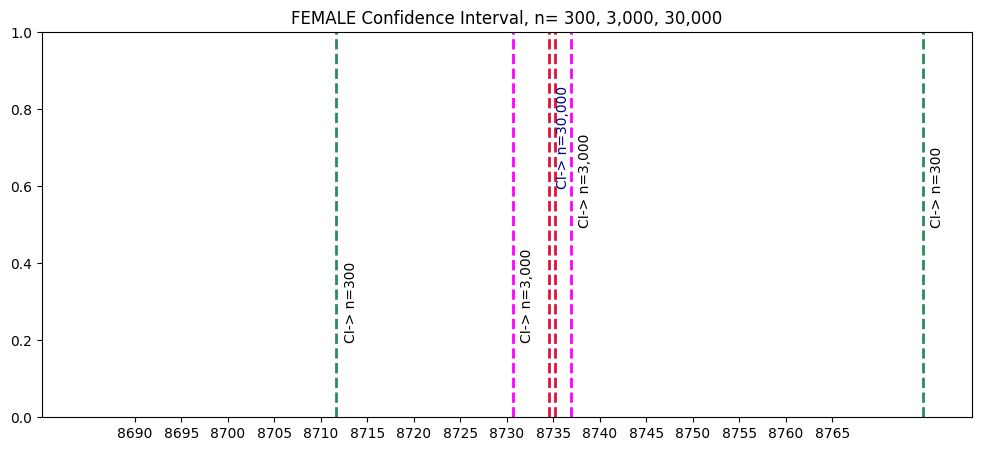

In [699]:
plt.figure(figsize=(12, 5))

plt.title("FEMALE Confidence Interval, n= 300, 3,000, 30,000")
plt.xlim(8680, 8780)
tick_ran = np.arange(8690, 8770,5)
plt.xticks(tick_ran)
plt.axvline(x=Sample_Female300_CI[0], color='seagreen', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Female300_CI[1], color='seagreen', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=Sample_Female3000_CI[0], color='fuchsia', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Female3000_CI[1], color='fuchsia', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=Sample_Female30000_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=Sample_Female30000_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.text(Sample_Female300_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=300', color='black', rotation=90)
plt.text(Sample_Female300_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=300', color='black', rotation=90)

plt.text(Sample_Female3000_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=3,000', color='black', rotation=90)
plt.text(Sample_Female3000_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=3,000', color='black', rotation=90)

plt.text(Sample_Female30000_CI[0]+ .8, plt.ylim()[1]*0.6, 'CI-> n=30,000', color='navy', rotation=90)

In [700]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Female Gender \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {Sample_Female300_CI[0]}           {Sample_Female300_CI[1]}")
print(f"  n= 3,000       {Sample_Female3000_CI[0]}          {Sample_Female3000_CI[1]}")
print(f"  n= 30,000      {Sample_Female30000_CI[0]}           {Sample_Female30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Female Gender 
 Value of N:     Lower CI                     Upper CI 
  n= 300         8711.670169126668           8774.733374206662
  n= 3,000       8730.673233220561          8736.873222112772
  n= 30,000      8734.550193701169           8735.176600765499


# **FEMALE CI COMPARISON: BOOTSTRAP METHOD**
**All three confidence intervals overlap, which means the average purchase amount is consistent across different sample sizes.**
- As the sample size increases, the confidence interval becomes narrower:
- At n = 300, the interval is wide, leading to more uncertainty.
- At n = 30,000, the interval is very tight, leading to high precision.
-  The average purchase amount for females is likely around 8735, since all intervals center near this value.
-  This shows that larger samples give more reliable estimates, but even small samples (like n = 300) give a similar average.
-  The bootstrap method is stable, as it gives consistent results across different sample sizes.


# **Mean, CI, Standard Deviation relation for male and female gender.**

Text([9463.03263358], 12427.275, 'Upper Male CI')

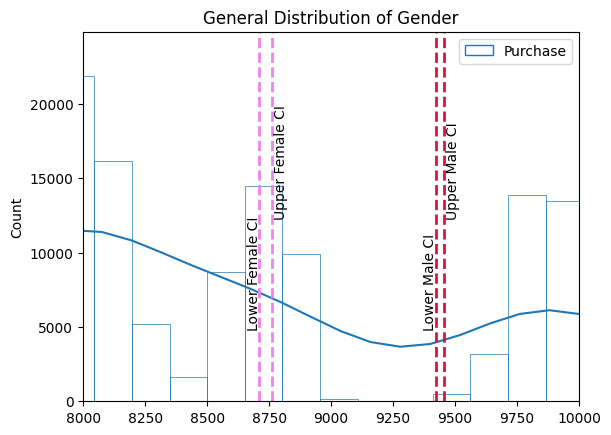

In [701]:
walmart_Male_pur =walmart_data[['Gender','Purchase']]
sns.histplot(walmart_Male_pur, kde=True, color= 'black', fill= False)
plt.title("General Distribution of Gender")
plt.axvline(x=True_Male_confidence[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=True_Male_confidence[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=True_Female_confidence[0], color='violet', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=True_Female_confidence[1], color='violet', linestyle='--', linewidth=2, label='Upper CI')
plt.xlim(8000, 10000)

plt.text(True_Female_confidence[0]-50, plt.ylim()[1]*0.2, 'Lower Female CI', color='black', rotation=90)
plt.text(True_Female_confidence[1]+10, plt.ylim()[1]*0.5, 'Upper Female CI', color='black', rotation=90)

plt.text(True_Male_confidence[0]-50, plt.ylim()[1]*0.2, 'Lower Male CI', color='black', rotation=90)
plt.text(True_Male_confidence[1]+10, plt.ylim()[1]*0.5, 'Upper Male CI', color='black', rotation=90)

In [702]:
print("\033[1m Report on the General Distribution of Male and Female Gender\033[0;0m \n")
print("The Mean, Standard Deviation and CI for Female Population is:")
print(f"Female Population Mean: {np.mean(walmart_Female_purchase['Purchase'])}")
print(f"Standard Deviation {np.std(walmart_Female_purchase['Purchase'])}")
print(f"Female Confidence Interval: [{True_Female_confidence[0], True_Female_confidence[1]}]")
print(f"Difference of the Female Confidence Interval {True_Female_confidence[1]- True_Female_confidence[0]}\n")

print("The Mean, Standard Deviation and CI for Male Population is:")
print(f"Male Population Mean: {np.mean(walmart_Male_purchase['Purchase'])}")
print(f"Standard Deviation {np.std(walmart_Male_purchase['Purchase'])}")
print(f"Male Confidence Interval: [{True_Male_confidence[0], True_Male_confidence[1]}]")
print(f"Difference of the Male Confidence Interval {True_Male_confidence[1]- True_Male_confidence[0]}")

 Report on the General Distribution of Male and Female Gender 

The Mean, Standard Deviation and CI for Female Population is:
Female Population Mean: 8734.565765155476
Standard Deviation 4767.215738016988
Female Confidence Interval: [(array([8709.21154714]), array([8759.91998317]))]
Difference of the Female Confidence Interval [50.70843603]

The Mean, Standard Deviation and CI for Male Population is:
Male Population Mean: 9437.526040472265
Standard Deviation 5092.180063635943
Male Confidence Interval: [(array([9422.01944736]), array([9453.03263358]))]
Difference of the Male Confidence Interval [31.01318622]


# **Affect of Male and Female Gender on Purchase:**
The female gender with a smaller group (females) has a wider confidence interval, because the sample size. Therefore, the difference in CI is greater for female than male.

Since the confidence intervals for males and females do not overlap, we can infer a statistically significant difference in their average spending. Hence, males tend to spend more than females on average.



---



# **How does Marital Status affect the amount spent?**

In [703]:
walmart_Marital_data= walmart_data[['Marital_Status','Purchase']]

# **Mean for Married People**

In [704]:
walmart_Married_data= walmart_data[walmart_data['Marital_Status']==1][['Marital_Status','Purchase']]
walmart_Married_data

,Marital_Status,Purchase
6,1,19215
7,1,15854
8,1,15686
9,1,7871
10,1,5254
...,...,...
550060,1,494
550061,1,599
550063,1,368
550065,1,137


# **Total Population Mean for Married People**

In [705]:
walmart_Married_data['Purchase'].describe()
#walmart_Married_data['Purchase'].loc['mean']

,Purchase
count,225337.000000
mean,9261.174574
std,5016.897378
min,12.000000
25%,5843.000000
50%,8051.000000
75%,12042.000000
max,23961.000000


In [706]:
Total_Married_mean= walmart_Married_data['Purchase'].describe()
Total_Married_mean= Total_Married_mean[1]
Total_Married_mean

np.float64(9261.174574082374)

# **Confidence Interval (95%) for Total Married Population**

In [707]:
True_Married_confidence = norm.interval(0.95, Total_Married_mean, Total_Married_std / np.sqrt(Total_Married_count))
True_Married_confidence

(np.float64(9240.460427057078), np.float64(9281.888721107669))

# **Sample Mean for Married People, n=300**

Sample Mean for 300 Married People is: 9264.70323888889
Standard deviation for 300 Married People is: 296.3758395753395


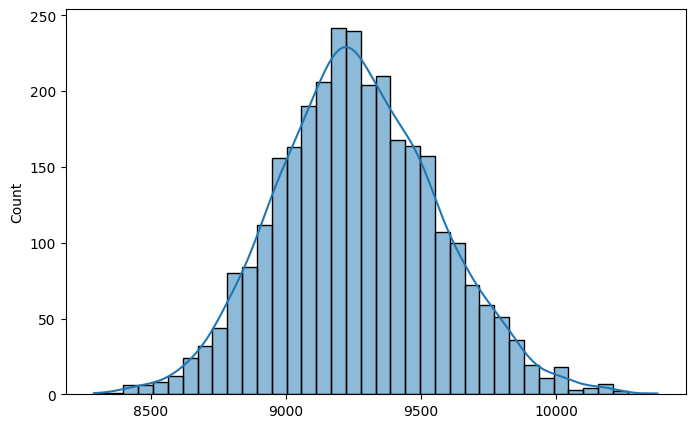

In [708]:
plt.figure(figsize=(8, 5))
sample1_300 = [np.mean(walmart_Married_data['Purchase'].sample(300, replace=True)) for i in range(3000)]
sns.histplot(sample1_300, kde=True)
print(f"Sample Mean for 300 Married People is: {np.mean(sample1_300)}")
print(f"Standard deviation for 300 Married People is: {np.std(sample1_300)}")

# **Confidence Interval Estimate (95%) for Married Individuals (n = 300)**

In [709]:
sample_1_300_CI = norm.interval(0.95, np.mean(sample1_300), np.std(sample1_300)/np.sqrt(300))
sample_1_300_CI

(np.float64(9231.165771690059), np.float64(9298.24070608772))

# **Sample Mean for Married People, n=3000**

Sample Mean for 3000 Married People is: 9263.509005222222
Standard deviation for 3000 Married People is: 92.03711565473972


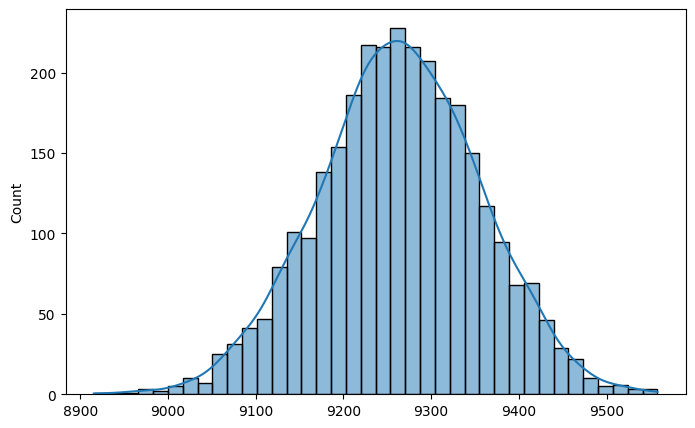

In [710]:
plt.figure(figsize=(8, 5))
sample1_3000= [np.mean(walmart_Married_data['Purchase'].sample(3000, replace= True)) for i in range(3000)]
sns.histplot(sample1_3000, kde=True)
print(f"Sample Mean for 3000 Married People is: {np.mean(sample1_3000)}")
print(f"Standard deviation for 3000 Married People is: {np.std(sample1_3000)}")

# **Confidence Interval Estimate (95%) for Married, n = 3,000.**

In [711]:
sample_1_3000_CI = norm.interval(0.95, np.mean(sample1_3000), np.std(sample1_3000)/np.sqrt(3000))
sample_1_3000_CI

(np.float64(9260.21555985554), np.float64(9266.802450588904))

# **Sample Mean for Married People, n=30000**

Sample Mean for 30000 Married People is: 9260.977780333333
Standard deviation for 30000 Married People is: 29.061850184565102


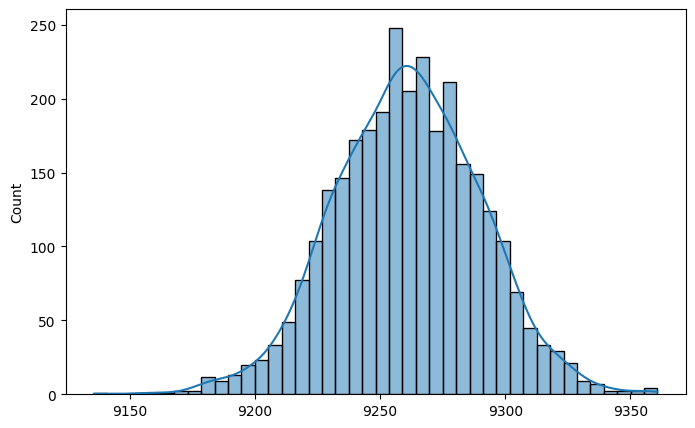

In [712]:
plt.figure(figsize=(8, 5))
sample1_30000= [np.mean(walmart_Married_data['Purchase'].sample(30000, replace= True)) for i in range(3000)]
sns.histplot(sample1_30000, kde=True)
print(f"Sample Mean for 30000 Married People is: {np.mean(sample1_30000)}")
print(f"Standard deviation for 30000 Married People is: {np.std(sample1_30000)}")

# **Confidence Interval Estimate (95%) for Married Individuals (n = 30,000)**

In [713]:
sample_1_30000_CI = norm.interval(0.95, np.mean(sample1_30000), np.std(sample1_30000)/np.sqrt(30000))
sample_1_30000_CI

(np.float64(9260.648920582586), np.float64(9261.30664008408))

# **Comparing the Married People CI for n= 300, 3000 and 30,000.**

Text(9261.448920582585, 0.6, 'CI-> n=30,000')

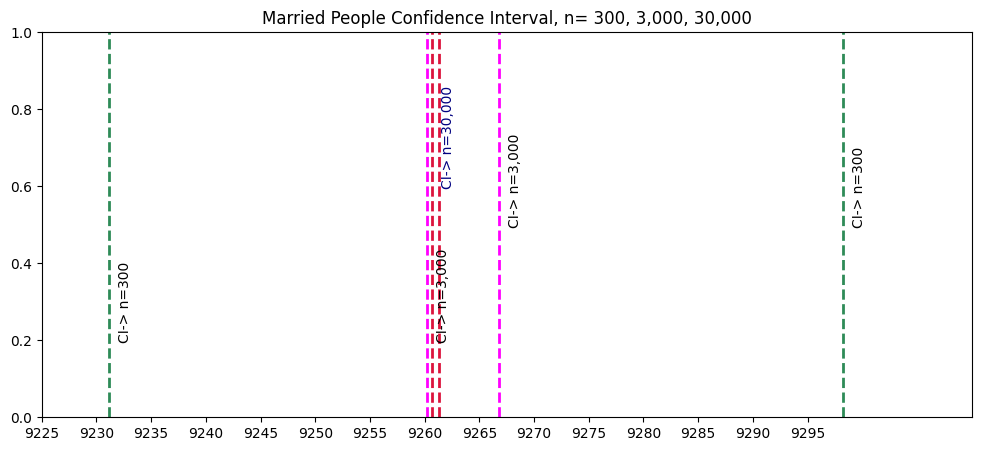

In [714]:
plt.figure(figsize=(12, 5))

plt.title("Married People Confidence Interval, n= 300, 3,000, 30,000")
plt.xlim(9225, 9310)
tick_ran = np.arange(9225,9300,5)
plt.xticks(tick_ran)
plt.axvline(x=sample_1_300_CI[0], color='seagreen', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample_1_300_CI[1], color='seagreen', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=sample_1_3000_CI[0], color='fuchsia', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample_1_3000_CI[1], color='fuchsia', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=sample_1_30000_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample_1_30000_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.text(sample_1_300_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=300', color='black', rotation=90)
plt.text(sample_1_300_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=300', color='black', rotation=90)

plt.text(sample_1_3000_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=3,000', color='black', rotation=90)
plt.text(sample_1_3000_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=3,000', color='black', rotation=90)

plt.text(sample_1_30000_CI[0]+ .8, plt.ylim()[1]*0.6, 'CI-> n=30,000', color='navy', rotation=90)

In [715]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Marital Status: Married \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {sample_1_300_CI[0]}           {sample_1_300_CI[1]}")
print(f"  n= 3,000       {sample_1_3000_CI[0]}          {sample_1_3000_CI[1]}")
print(f"  n= 30,000      {sample_1_30000_CI[0]}           {sample_1_30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Marital Status: Married 
 Value of N:     Lower CI                     Upper CI 
  n= 300         9231.165771690059           9298.24070608772
  n= 3,000       9260.21555985554          9266.802450588904
  n= 30,000      9260.648920582586           9261.30664008408


# **MARRIED PEOPLE CI COMPARISON: BOOTSTRAP METHOD**

All three confidence intervals overlap, indicating that the average purchase amount for married individuals remains stable regardless of sample size.

As the sample size grows, the confidence interval becomes sharper and more precise:

n = 300: Wide CI (±65), reflecting high uncertainty.

n = 3,000: Narrower CI (±6.5), showing better precision.

n = 30,000: Extremely tight CI (±0.65), achieving near-exact estimates.

Since all intervals center close to 9261, this is likely the true average purchase amount for married individuals in the population.

Small samples (n=300) introduce significant variability—useful for rough estimates but risky for decisions.

Large samples (n=30,000) provide near-certainty, making them ideal for actionable insights.

The results align across all sample sizes, proving the method’s reliability for estimating population means.

#**Mean for Single People**

In [716]:
walmart_Single_data= walmart_data[walmart_data['Marital_Status']==0][['Marital_Status','Purchase']]
walmart_Single_data

,Marital_Status,Purchase
0,0,8370
1,0,15200
2,0,1422
3,0,1057
4,0,7969
...,...,...
550056,0,254
550059,0,48
550062,0,473
550064,0,371


# **Total Population Mean for Single People**

In [717]:
walmart_Single_data['Purchase'].describe()
#walmart_Married_data['Purchase'].loc['mean']

,Purchase
count,324731.000000
mean,9265.907619
std,5027.347859
min,12.000000
25%,5605.000000
50%,8044.000000
75%,12061.000000
max,23961.000000


In [718]:
Total_Single_mean= walmart_Single_data['Purchase'].describe()
Total_Single_mean

,Purchase
count,324731.000000
mean,9265.907619
std,5027.347859
min,12.000000
25%,5605.000000
50%,8044.000000
75%,12061.000000
max,23961.000000


# **Confidence Interval (95%) for Total Single Population**

In [719]:
True_Single_confidence= norm.interval(0.95, Total_Single_mean.loc['mean'], Total_Single_mean.loc['std']/np.sqrt(Total_Single_mean.loc['count']))
True_Single_confidence

(np.float64(9248.61641818668), np.float64(9283.198819656332))

# **Sample Mean for Single People, n=300**

Sample Mean for 300 Single People is: 9261.04119809524
Standard deviation for Single People,n=300, is: 292.0129832551744


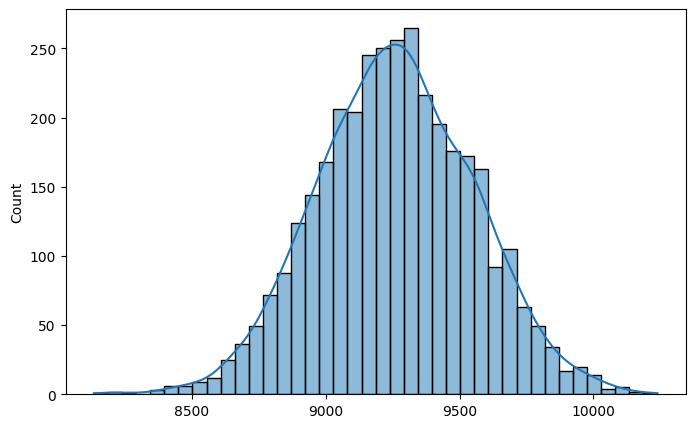

In [720]:
plt.figure(figsize=(8, 5))
sample0_300= [np.mean(walmart_Single_data['Purchase'].sample(300, replace=True)) for i in range(3500)]
sns.histplot(sample0_300, kde= True)
print(f"Sample Mean for 300 Single People is: {np.mean(sample0_300)}")
print(f"Standard deviation for Single People,n=300, is: {np.std(sample0_300)}")

# **Confidence Interval for Single People for Sample Size= 300**

In [721]:
sample0_300_CI= norm.interval(.95,np.mean(sample0_300),np.std(sample0_300)/np.sqrt(300))
sample0_300_CI

(np.float64(9227.997425493582), np.float64(9294.084970696897))

# **Sample Mean for Single People, n= 3,000**

Sample Mean for 3,000 Single People is: 9265.773889333333
Standard deviation for Single People,n=3,000, is: 292.0129832551744


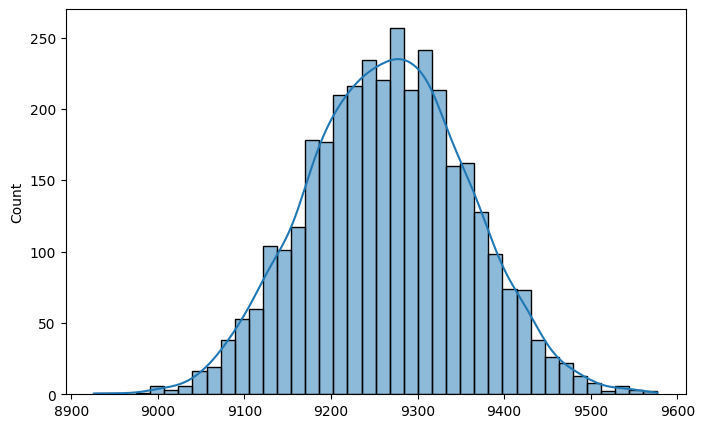

In [722]:
plt.figure(figsize=(8, 5))
sample0_3000= [np.mean(walmart_Single_data['Purchase'].sample(3000, replace=True)) for i in range(3500)]
sns.histplot(sample0_3000, kde= True)
print(f"Sample Mean for 3,000 Single People is: {np.mean(sample0_3000)}")
print(f"Standard deviation for Single People,n=3,000, is: {np.std(sample0_300)}")

# **Confidence Interval for Single People for Sample Size= 3,000**

In [723]:
sample0_3000_CI= norm.interval(.95,np.mean(sample0_3000),np.std(sample0_3000)/np.sqrt(3000))
sample0_3000_CI

(np.float64(9262.468231281895), np.float64(9269.079547384772))

# **Sample Mean for Single People, n=30,000**

Sample Mean for 30,000 Single People is: 9265.77701395238
Standard deviation for Single People, n=30,000, is: 92.3784057489446


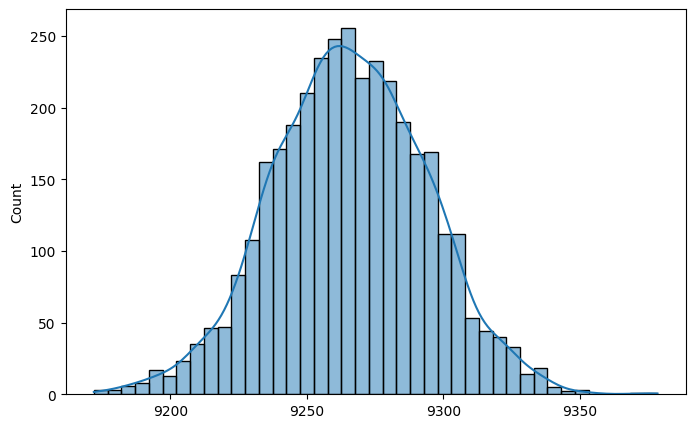

In [724]:
plt.figure(figsize=(8, 5))
sample0_30000= [np.mean(walmart_Single_data['Purchase'].sample(30000, replace=True)) for i in range(3500)]
sns.histplot(sample0_30000, kde= True)
print(f"Sample Mean for 30,000 Single People is: {np.mean(sample0_30000)}")
print(f"Standard deviation for Single People, n=30,000, is: {np.std(sample0_3000)}")

# **Confidence Interval for Single People for Sample Size= 30,000**

In [725]:
sample0_30000_CI= norm.interval(.95,np.mean(sample0_30000),np.std(sample0_30000)/np.sqrt(30000))
sample0_30000_CI

(np.float64(9265.458332298216), np.float64(9266.095695606544))

# **Comparing the Single People CI for n= 300, 3000 and 30,000.**

Text(9266.258332298215, 0.6, 'CI-> n=30,000')

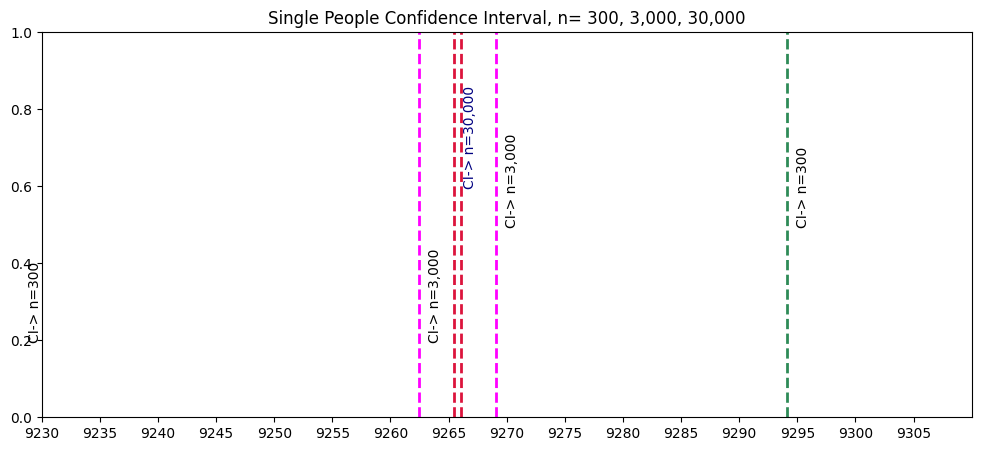

In [726]:
plt.figure(figsize=(12, 5))

plt.title("Single People Confidence Interval, n= 300, 3,000, 30,000")
plt.xlim(9230, 9310)
tick_ran = np.arange(9230,9310,5)
plt.xticks(tick_ran)
plt.axvline(x=sample0_300_CI[0], color='seagreen', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample0_300_CI[1], color='seagreen', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=sample0_3000_CI[0], color='fuchsia', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample0_3000_CI[1], color='fuchsia', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=sample0_30000_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=sample0_30000_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.text(sample0_300_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=300', color='black', rotation=90)
plt.text(sample0_300_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=300', color='black', rotation=90)

plt.text(sample0_3000_CI[0]+ .8, plt.ylim()[1]*0.2, 'CI-> n=3,000', color='black', rotation=90)
plt.text(sample0_3000_CI[1]+ .8, plt.ylim()[1]*0.5, 'CI-> n=3,000', color='black', rotation=90)

plt.text(sample0_30000_CI[0]+ .8, plt.ylim()[1]*0.6, 'CI-> n=30,000', color='navy', rotation=90)

In [727]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Marital Status: Single \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {sample0_300_CI[0]}           {sample0_300_CI[1]}")
print(f"  n= 3,000       {sample0_3000_CI[0]}          {sample0_3000_CI[1]}")
print(f"  n= 30,000      {sample0_30000_CI[0]}           {sample0_30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Marital Status: Single 
 Value of N:     Lower CI                     Upper CI 
  n= 300         9227.997425493582           9294.084970696897
  n= 3,000       9262.468231281895          9269.079547384772
  n= 30,000      9265.458332298216           9266.095695606544


# **SINGLE PEOPLE COMPARISON: BOOTSTRAP METHOD**

All three confidence intervals overlap, meaning the average purchase amount stays consistent across sample sizes.
As sample size increases, the confidence interval becomes narrower:

At n = 300, the CI is wide, giving more uncertainty.

At n = 3,000, the CI is narrower.

At n = 30,000, the CI is very tight leading to high precision.

The average purchase amount for single individuals is likely around 9265, since all intervals center near this value.
This shows that larger samples give more reliable and stable estimates of the population mean.
The bootstrap method is consistent, as it gives similar results across all sample sizes.


# **Married and Single People Comparison:**

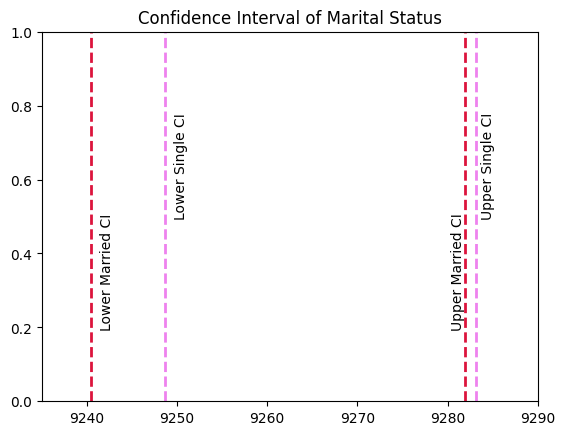

In [728]:
#sns.histplot(walmart_Marital_data, kde=True, color= 'black', fill= False)
plt.title("Confidence Interval of Marital Status")
plt.axvline(x=True_Married_confidence[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=True_Married_confidence[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=True_Single_confidence[0], color='violet', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=True_Single_confidence[1], color='violet', linestyle='--', linewidth=2, label='Upper CI')
plt.xlim(9235, 9290)
tikran= np.arange(9235, 9285,4)

plt.text(True_Married_confidence[0]+1, plt.ylim()[1]*0.2, 'Lower Married CI', color='black', rotation=90)
plt.text(True_Married_confidence[1]-1.5, plt.ylim()[1]*0.2, 'Upper Married CI', color='black', rotation=90)

plt.text(True_Single_confidence[0]+1, plt.ylim()[1]*0.5, 'Lower Single CI', color='black', rotation=90)
plt.text(True_Single_confidence[1]+0.5, plt.ylim()[1]*0.5, 'Upper Single CI', color='black', rotation=90)
plt.show()

# **Mean, CI, Standard Deviation Relation for Single and Married.**

In [729]:
print("\033[1m Report on the General Distribution of Married and Single Population\033[0;0m \n")
print("The Mean, Standard Deviation and CI for Married Population[1] is:")
print(f"Married Population Mean: {np.mean(walmart_Married_data['Purchase'])}")
print(f"Standard Deviation {np.std(walmart_Married_data['Purchase'])}")
print(f"Married Confidence Interval: [{True_Married_confidence[0], True_Married_confidence[1]}]")
print(f"Difference of the Married Confidence Interval {True_Married_confidence[1]- True_Married_confidence[0]}\n")

print("The Mean, Standard Deviation and CI for Single[0] Population is:")
print(f"Single Population Mean: {np.mean(walmart_Single_data['Purchase'])}")
print(f"Standard Deviation {np.std(walmart_Single_data['Purchase'])}")
print(f"Single Confidence Interval: [{True_Single_confidence[0], True_Single_confidence[1]}]")
print(f"Difference of the Single Confidence Interval {True_Single_confidence[1]- True_Single_confidence[0]}")

 Report on the General Distribution of Married and Single Population 

The Mean, Standard Deviation and CI for Married Population[1] is:
Married Population Mean: 9261.174574082374
Standard Deviation 5016.886245793184
Married Confidence Interval: [(np.float64(9240.460427057078), np.float64(9281.888721107669))]
Difference of the Married Confidence Interval 41.42829405059092

The Mean, Standard Deviation and CI for Single[0] Population is:
Single Population Mean: 9265.907618921507
Standard Deviation 5027.340117880186
Single Confidence Interval: [(np.float64(9248.61641818668), np.float64(9283.198819656332))]
Difference of the Single Confidence Interval 34.58240146965181


# **Affect of Married and Single People on Purchase**

The confidence interval for married people ranges from 9240 to 9280.
The confidence interval for single people ranges from 9250 to 9285.
Both intervals overlap, which means the average purchase amount is similar for both groups.Hence, this might be due to random variation.
The married group's interval is slightly wider, suggesting a bit more variation in their purchase amounts.
The single group's interval is slightly shifted to the right, meaning their average purchase might be a little higher than that of married individuals.
Overall, both groups spend around the same amount, but single individuals may spend slightly more on average.


## **How does Age affect the amount spent?**

#**Age Group [ 0-17 ]**

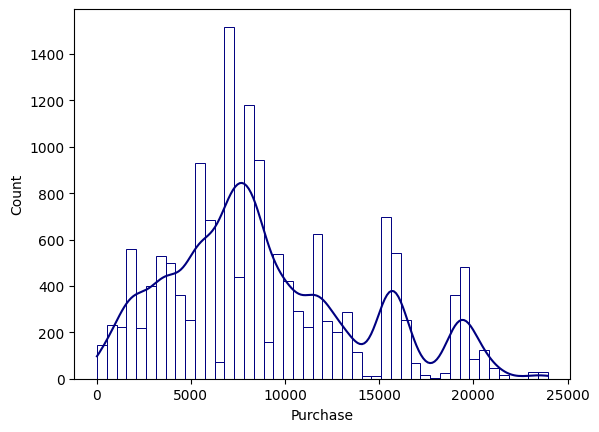

In [730]:
walmart_age_data = walmart_data[['Purchase','Age']]
walmart_0_17 =walmart_age_data[walmart_age_data['Age']== '0-17']
sns.histplot(walmart_0_17, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [ 0-17 ]**

In [731]:
print(walmart_0_17.describe())
print(np.mean(walmart_0_17['Purchase']))

           Purchase
count  15102.000000
mean    8933.464640
std     5111.114046
min       12.000000
25%     5328.000000
50%     7986.000000
75%    11874.000000
max    23955.000000
8933.464640444974


# **CI for Age Group [0-17]**

In [732]:
walmart_0_17_CI= norm.interval(0.95,walmart_0_17['Purchase'].mean(),walmart_0_17['Purchase'].std()/np.sqrt(walmart_0_17['Purchase'].count()))
walmart_0_17_CI

(np.float64(8851.947970542686), np.float64(9014.981310347262))

#**Sample Mean for Age Group [0-17], n= 300**



Sample Mean for Age Group[0-17],n=300 is: 8943.861157142856
Standard deviation for Age Group[0-17], n=300 is: 295.979433104489


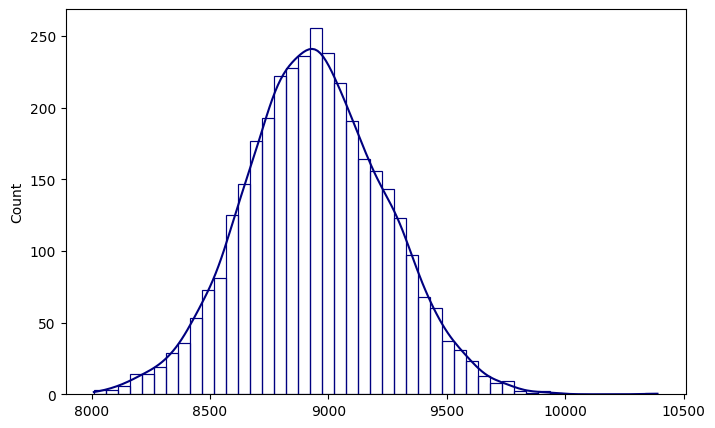

In [733]:
walmart_0_17_300= [np.mean(walmart_0_17.sample(300, replace=True)['Purchase']) for i in range(3500)]
plt.figure(figsize=(8, 5))
sns.histplot(walmart_0_17_300, fill= False, color='navy', kde= True)
print(f"Sample Mean for Age Group[0-17],n=300 is: {np.mean(walmart_0_17_300)}")
print(f"Standard deviation for Age Group[0-17], n=300 is: {np.std(walmart_0_17_300)}")

#**CI (95%) for Age Group [0-17], n= 300**

In [734]:
walmart_0_17_300_CI= norm.interval(.95,np.mean(walmart_0_17_300), np.std(walmart_0_17_300)/np.sqrt(300))
walmart_0_17_300_CI

(np.float64(8910.368546734757), np.float64(8977.353767550954))

#**Sample Mean for Age Group [0-17], n= 3000**



Sample Mean for Age Group[0-17],n=3000 is: 8933.876053904762
Standard deviation for Age Group[0-17], n=3000 is: 92.85170987780882


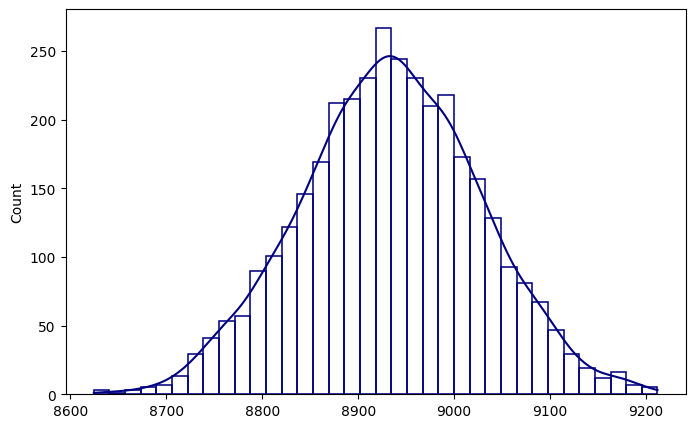

In [735]:
walmart_0_17_3000= [np.mean(walmart_0_17.sample(3000, replace=True)['Purchase']) for i in range(3500)]
plt.figure(figsize=(8, 5))
sns.histplot(walmart_0_17_3000, fill= False, color='navy', kde= True)
print(f"Sample Mean for Age Group[0-17],n=3000 is: {np.mean(walmart_0_17_3000)}")
print(f"Standard deviation for Age Group[0-17], n=3000 is: {np.std(walmart_0_17_3000)}")

#**CI (95%) for Age Group [0-17], n= 3000**

In [736]:
walmart_0_17_3000_CI= norm.interval(.95,np.mean(walmart_0_17_3000), np.std(walmart_0_17_3000)/np.sqrt(3000))
walmart_0_17_3000_CI

(np.float64(8930.553459193812), np.float64(8937.198648615711))

#**Sample Mean for Age Group [0-17], n= 30,000**



Sample Mean for Age Group[0-17],n=30,000 is: 8934.280709914285
Standard deviation for Age Group[0-17], n=30,000 is: 29.156017991266772


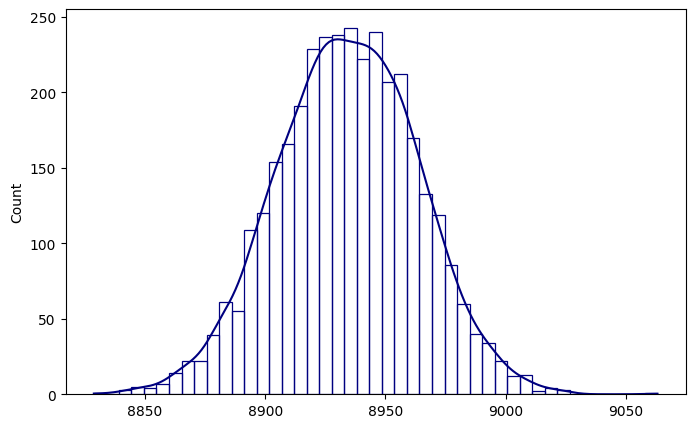

In [737]:
walmart_0_17_30000= [np.mean(walmart_0_17.sample(30000, replace=True)['Purchase']) for i in range(3500)]
plt.figure(figsize=(8, 5))
sns.histplot(walmart_0_17_30000, fill= False, color='navy', kde= True)
print(f"Sample Mean for Age Group[0-17],n=30,000 is: {np.mean(walmart_0_17_30000)}")
print(f"Standard deviation for Age Group[0-17], n=30,000 is: {np.std(walmart_0_17_30000)}")

#**CI (95%) for Age Group [0-17], n= 30,000**

In [738]:
walmart_0_17_30000_CI= norm.interval(.95,np.mean(walmart_0_17_30000), np.std(walmart_0_17_30000)/np.sqrt(30000))
walmart_0_17_30000_CI

(np.float64(8933.95078457407), np.float64(8934.6106352545))

# **Comparing the Age Group [0-17] CI for n= 300, 3000 and 30,000.**

Text(8935.15078457407, 0.4, 'CI-> n=30,000')

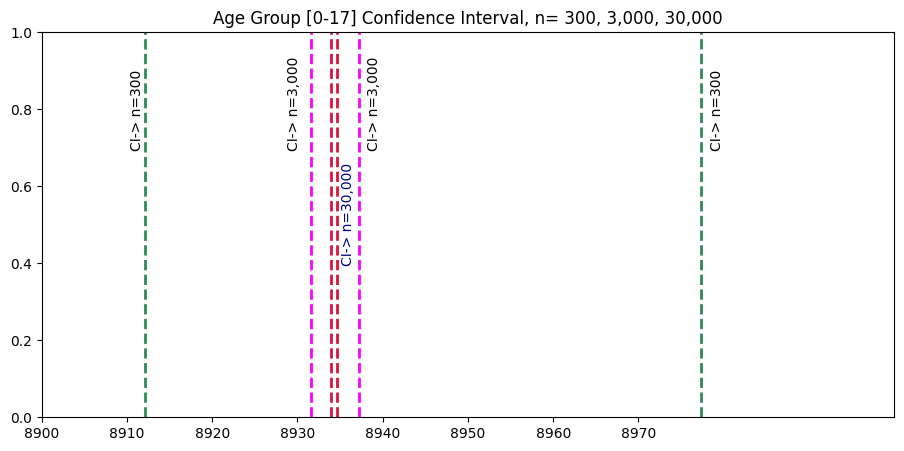

In [739]:
plt.figure(figsize=(11, 5))

plt.title("Age Group [0-17] Confidence Interval, n= 300, 3,000, 30,000")
plt.xlim(8900, 9000)
tick_r = np.arange(8900,8980,10)
plt.xticks(tick_r)
plt.axvline(x=walmart_0_17_300_CI[0]+1.8, color='seagreen', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_0_17_300_CI[1], color='seagreen', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_0_17_3000_CI[0]+1, color='fuchsia', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_0_17_3000_CI[1], color='fuchsia', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_0_17_30000_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_0_17_30000_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.text(walmart_0_17_300_CI[0], plt.ylim()[1]*0.7, 'CI-> n=300', color='black', rotation=90)
plt.text(walmart_0_17_300_CI[1]+1, plt.ylim()[1]*0.7, 'CI-> n=300', color='black', rotation=90)

plt.text(walmart_0_17_3000_CI[0]-1.8, plt.ylim()[1]*0.7, 'CI-> n=3,000', color='black', rotation=90)
plt.text(walmart_0_17_3000_CI[1]+1, plt.ylim()[1]*0.7, 'CI-> n=3,000', color='black', rotation=90)

plt.text(walmart_0_17_30000_CI[0]+1.2, plt.ylim()[1]*0.4, 'CI-> n=30,000', color='navy', rotation=90)

In [740]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Age Group[0-17]: \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {walmart_0_17_300_CI[0]}           {walmart_0_17_300_CI[1]}")
print(f"  n= 3,000       {walmart_0_17_3000_CI[0]}          {walmart_0_17_3000_CI[1]}")
print(f"  n= 30,000      {walmart_0_17_30000_CI[0]}           {walmart_0_17_30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Age Group[0-17]: 
 Value of N:     Lower CI                     Upper CI 
  n= 300         8910.368546734757           8977.353767550954
  n= 3,000       8930.553459193812          8937.198648615711
  n= 30,000      8933.95078457407           8934.6106352545


# **Age Group[0-17] COMPARISON: BOOTSTRAP METHOD**

All three confidence intervals overlap, meaning the average purchase amount for this age group stays consistent across different sample sizes.
As sample size increases, the confidence interval becomes narrower:
- At n = 300, the CI is wide (approx. 8900 to 8960), showing more uncertainty.
- At n = 3,000, the CI is much narrower and centered around 8940.
- At n = 30,000, the CI is very tight and also centered around 8940, showing high precision.
The average purchase amount for the 0–17 age group is likely around 8940, since all intervals center near this value.
This shows that larger samples give more reliable and stable estimates of the population mean.
The bootstrap method is consistent, as it gives similar results across all sample sizes.


# **Age Group [18-25]**

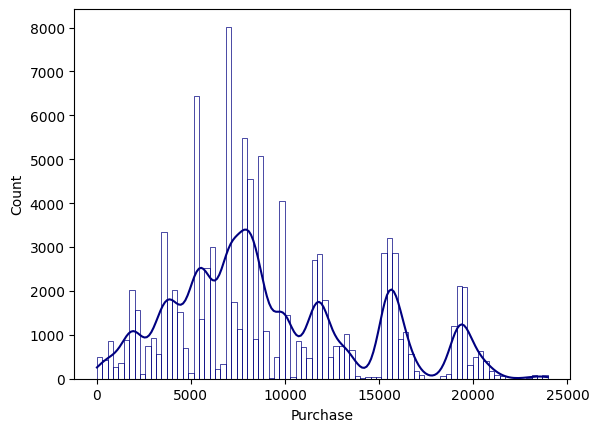

In [741]:
walmart_age_data = walmart_data[['Purchase','Age']]
walmart_18_25 =walmart_age_data[walmart_age_data['Age']== '18-25']
walmart_18_25
sns.histplot(walmart_18_25, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [18-25]**

In [742]:
print(walmart_18_25.describe())
print(np.mean(walmart_18_25['Purchase']))

           Purchase
count  99660.000000
mean    9169.663606
std     5034.321997
min       12.000000
25%     5415.000000
50%     8027.000000
75%    12028.000000
max    23958.000000
9169.663606261289


# **CI for Age Group [18-25]**

In [743]:
walmart_18_25_CI= norm.interval(0.95,walmart_18_25['Purchase'].mean(),walmart_18_25['Purchase'].std()/np.sqrt(walmart_18_25['Purchase'].count()))
walmart_18_25_CI

(np.float64(9138.407948753442), np.float64(9200.919263769136))

#**Sample Mean for Age Group [18-25], n= 300**



Sample Mean for Age Group[18-25],n=300 is: 9168.79145904762
Standard deviation for Age Group[18-25], n=300 is: 285.0304822583875


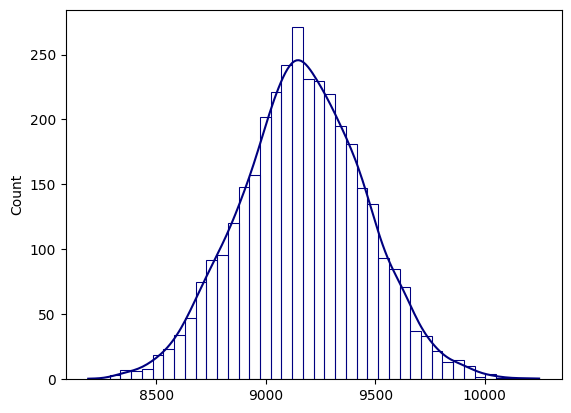

In [744]:
walmart_18_25_300 = [walmart_18_25.sample(300, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_18_25_300, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[18-25],n=300 is: {np.mean(walmart_18_25_300)}")
print(f"Standard deviation for Age Group[18-25], n=300 is: {np.std(walmart_18_25_300)}")

# **CI (95%) for Age Group [18-25], n= 300**

In [745]:
walmart_18_25_300_CI= norm.interval(.95,np.mean(walmart_18_25_300),np.std(walmart_18_25_300)/np.sqrt(300))
walmart_18_25_300_CI

(np.float64(9136.537816297576), np.float64(9201.045101797663))

#**Sample Mean for Age Group [18-25], n= 3000**



Sample Mean for Age Group[18-25],n=3000 is: 9169.689230857142
Standard deviation for Age Group[18-25], n=3000 is: 92.55562309649217


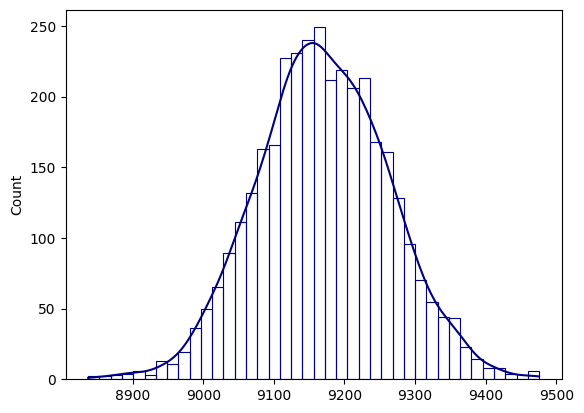

In [746]:
walmart_18_25_3000 = [walmart_18_25.sample(3000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_18_25_3000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[18-25],n=3000 is: {np.mean(walmart_18_25_3000)}")
print(f"Standard deviation for Age Group[18-25], n=3000 is: {np.std(walmart_18_25_3000)}")

# **CI (95%) for Age Group [18-25], n=3000**

In [747]:
walmart_18_25_3000_CI= norm.interval(.95,np.mean(walmart_18_25_3000),np.std(walmart_18_25_3000)/np.sqrt(3000))
walmart_18_25_3000_CI

(np.float64(9166.377231280896), np.float64(9173.001230433389))

#**Sample Mean for Age Group [18-25], n= 30,000**



Sample Mean for Age Group [18-25],n=30,000 is: 9169.552127961904
Standard deviation for Age Group [18-25], n=30,000 is: 29.52729219118596


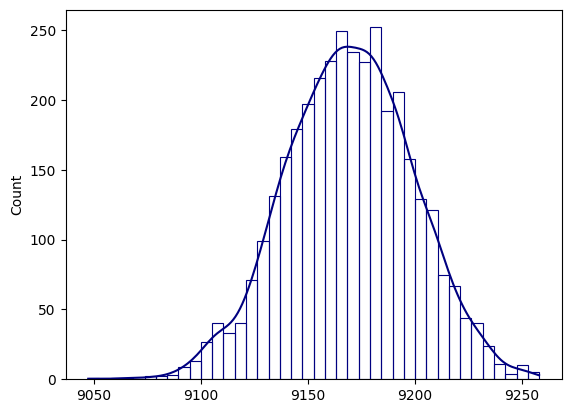

In [748]:
walmart_18_25_30000 = [walmart_18_25.sample(30000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_18_25_30000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group [18-25],n=30,000 is: {np.mean(walmart_18_25_30000)}")
print(f"Standard deviation for Age Group [18-25], n=30,000 is: {np.std(walmart_18_25_30000)}")

# **CI (95%) for Age Group [18-25], n=30,000**

In [749]:
walmart_18_25_30000_CI= norm.interval(.95,np.mean(walmart_18_25_30000),np.std(walmart_18_25_30000)/np.sqrt(30000))
walmart_18_25_30000_CI

(np.float64(9169.21800133581), np.float64(9169.886254587998))

# **Comparing the Age Group [18-25] CI for n= 300, 3000 and 30,000.**

In [750]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Age Group[18-25]: \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {walmart_18_25_300_CI[0]}           {walmart_18_25_300_CI[1]}")
print(f"  n= 3,000       {walmart_18_25_3000_CI[0]}          {walmart_18_25_3000_CI[1]}")
print(f"  n= 30,000      {walmart_18_25_30000_CI[0]}           {walmart_18_25_30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Age Group[18-25]: 
 Value of N:     Lower CI                     Upper CI 
  n= 300         9136.537816297576           9201.045101797663
  n= 3,000       9166.377231280896          9173.001230433389
  n= 30,000      9169.21800133581           9169.886254587998


# **Age Group [18-25] COMPARISON: BOOTSTRAP METHOD**

All three confidence intervals overlap, meaning the average purchase amount for the 18–25 age group stays consistent across different sample sizes.
As sample size increases, the confidence interval becomes narrower:
At n = 300, the CI is wide (from 9133 to 9199), showing more uncertainty.
At n = 3,000, the CI is much narrower (from 9167 to 9173).
At n = 30,000, the CI is extremely tight (from 9169 to 9170), showing high precision.
The average purchase amount for this age group is likely around 9170, since all intervals center near this value.
This shows that larger samples give more reliable and stable estimates of the population mean.
The bootstrap method is consistent, as it gives similar results across all sample sizes.

# **Age Group [26-35]**

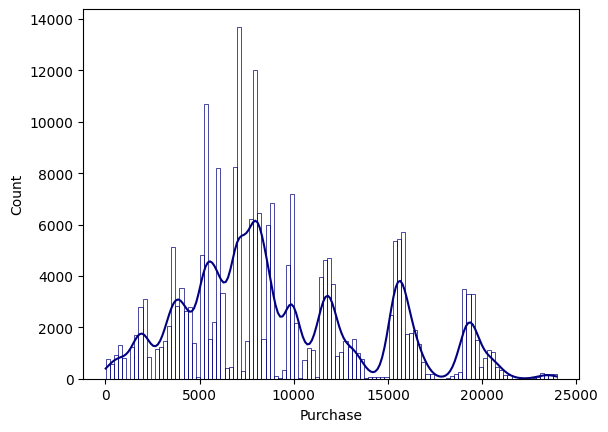

In [751]:
walmart_age_data = walmart_data[['Purchase','Age']]
walmart_26_35 =walmart_age_data[walmart_age_data['Age']== '26-35']
walmart_26_35
sns.histplot(walmart_26_35, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [26-35]**

In [752]:
print(walmart_26_35.describe())
print(np.mean(walmart_26_35['Purchase']))

            Purchase
count  219587.000000
mean     9252.690633
std      5010.527303
min        12.000000
25%      5475.000000
50%      8030.000000
75%     12047.000000
max     23961.000000
9252.690632869888


# **CI for Age Group [26-35]**

In [753]:
walmart_26_35_CI= norm.interval(0.95,walmart_26_35['Purchase'].mean(),walmart_26_35['Purchase'].std()/np.sqrt(walmart_26_35['Purchase'].count()))
walmart_26_35_CI

(np.float64(9231.73367640003), np.float64(9273.647589339746))

#**Sample Mean for Age Group [26-35], n= 300**



Sample Mean for Age Group[26-35],n=300 is: 9259.453495238096
Standard deviation for Age Group[26-35], n=300 is: 288.01624551782373


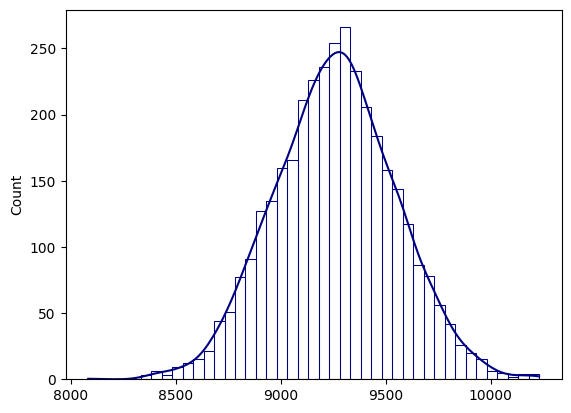

In [754]:
walmart_26_35_300 = [walmart_26_35.sample(300, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_26_35_300, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[26-35],n=300 is: {np.mean(walmart_26_35_300)}")
print(f"Standard deviation for Age Group[26-35], n=300 is: {np.std(walmart_26_35_300)}")

# **CI (95%) for Age Group [26-35], n= 300**

In [755]:
walmart_26_35_300_CI= norm.interval(.95,np.mean(walmart_26_35_300),np.std(walmart_26_35_300)/np.sqrt(300))
walmart_26_35_300_CI

(np.float64(9226.861987777082), np.float64(9292.045002699111))

#**Sample Mean for Age Group [26-35], n= 3000**



Sample Mean for Age Group[26-35],n=3000 is: 9254.17435247619
Standard deviation for Age Group[26-35], n=3000 is: 90.67627843437255


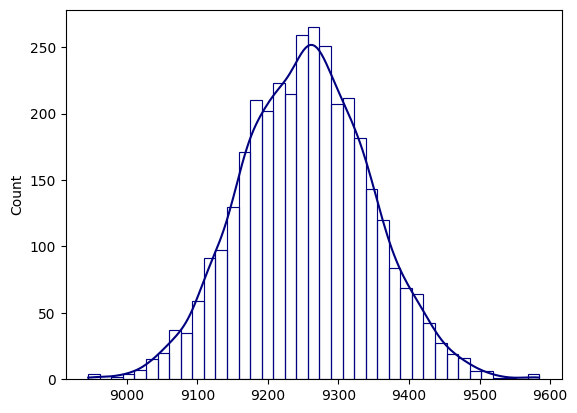

In [756]:
walmart_26_35_3000 = [walmart_26_35.sample(3000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_26_35_3000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[26-35],n=3000 is: {np.mean(walmart_26_35_3000)}")
print(f"Standard deviation for Age Group[26-35], n=3000 is: {np.std(walmart_26_35_3000)}")

# **CI (95%) for Age Group [26-35], n=3000**

In [757]:
walmart_26_35_3000_CI= norm.interval(.95,np.mean(walmart_26_35_3000),np.std(walmart_26_35_3000)/np.sqrt(3000))
walmart_26_35_3000_CI

(np.float64(9250.929603149212), np.float64(9257.419101803167))

#**Sample Mean for Age Group [26-35], n= 30,000**



Sample Mean for Age Group [26-35],n=30,000 is: 9252.264077542857
Standard deviation for Age Group [26-35], n=30,000 is: 28.692470410565807


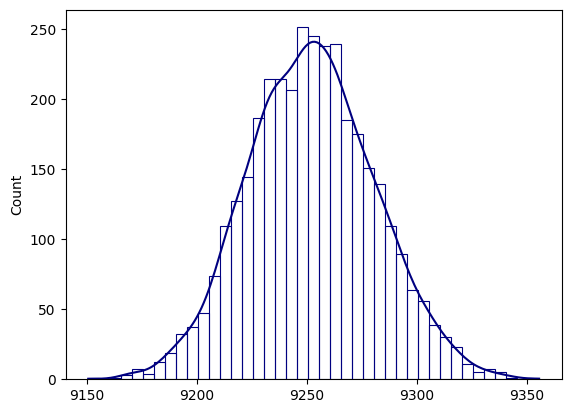

In [758]:
walmart_26_35_30000 = [walmart_26_35.sample(30000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_26_35_30000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group [26-35],n=30,000 is: {np.mean(walmart_26_35_30000)}")
print(f"Standard deviation for Age Group [26-35], n=30,000 is: {np.std(walmart_26_35_30000)}")

# **CI (95%) for Age Group [26-35], n=30,000**

In [759]:
walmart_26_35_30000_CI= norm.interval(.95,np.mean(walmart_26_35_30000),np.std(walmart_26_35_30000)/np.sqrt(30000))
walmart_26_35_30000_CI

(np.float64(9251.939397640937), np.float64(9252.588757444777))

# **Comparing the Age Group [26-35] CI for n= 300, 3000 and 30,000.**

In [760]:
print("\033[1m BOOTSTRAPPING METHOD: COMPARING CI for Age Group[26-35]: \033[0;0m")
print("\033[1m Value of N:     Lower CI                     Upper CI \033[0;0m")
print(f"  n= 300         {walmart_26_35_300_CI[0]}           {walmart_26_35_300_CI[1]}")
print(f"  n= 3,000       {walmart_26_35_3000_CI[0]}          {walmart_26_35_3000_CI[1]}")
print(f"  n= 30,000      {walmart_26_35_30000_CI[0]}           {walmart_26_35_30000_CI[1]}")

 BOOTSTRAPPING METHOD: COMPARING CI for Age Group[26-35]: 
 Value of N:     Lower CI                     Upper CI 
  n= 300         9226.861987777082           9292.045002699111
  n= 3,000       9250.929603149212          9257.419101803167
  n= 30,000      9251.939397640937           9252.588757444777


# **Age Group [18-25] COMPARISON: BOOTSTRAP METHOD**

All three confidence intervals overlap, meaning the average purchase amount for the 26–35 age group stays consistent across different sample sizes.
As sample size increases, the confidence interval becomes narrower:
At n = 300, the CI is wide (from 9223.72 to 9289.79), showing more uncertainty.
At n = 3,000, the CI is much narrower (from 9249.75 to 9256.44).
At n = 30,000, the CI is extremely tight (from 9252.09 to 9252.74), showing high precision.
The average purchase amount for this age group is likely around 9252, since all intervals center near this value.
This shows that larger samples give more reliable and stable estimates of the population mean.
The bootstrap method is consistent, as it gives similar results across all sample sizes.


# **Age Group [36-45]**

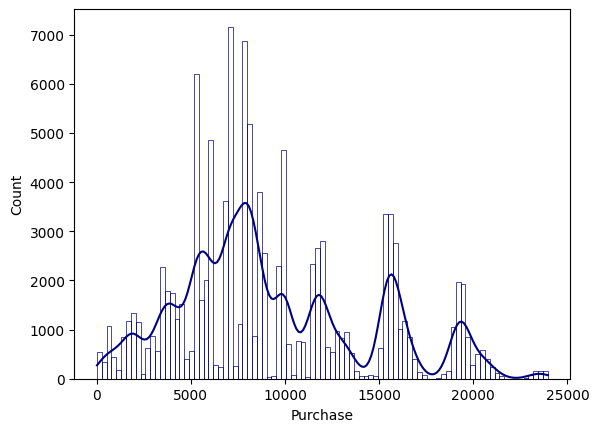

In [761]:
walmart_36_45 =walmart_age_data[walmart_age_data['Age']== '36-45']
walmart_36_45
sns.histplot(walmart_36_45, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group  [36-45]**

In [762]:
print(walmart_36_45.describe())
print(np.mean(walmart_36_45['Purchase']))

            Purchase
count  110013.000000
mean     9331.350695
std      5022.923879
min        12.000000
25%      5876.000000
50%      8061.000000
75%     12107.000000
max     23960.000000
9331.350694917874


# **CI for Age Group [36-45]**

In [763]:
walmart_36_45_CI= norm.interval(0.95,walmart_36_45['Purchase'].mean(),walmart_36_45['Purchase'].std()/np.sqrt(walmart_36_45['Purchase'].count()))
walmart_36_45_CI

(np.float64(9301.669410965314), np.float64(9361.031978870433))

# **Sample Mean for Age Group [36-45], n=300**

Sample Mean for Age Group[36-45],n=300 is: 9333.662187619047
Standard deviation for Age Group[36-45], n=300 is: 292.6633879587878


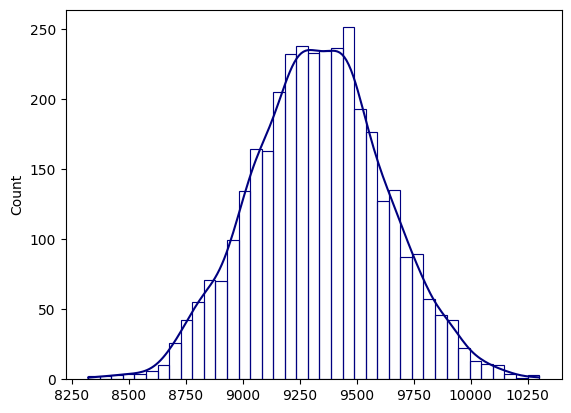

In [764]:
walmart_36_45_300 = [walmart_36_45.sample(300, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_36_45_300, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[36-45],n=300 is: {np.mean(walmart_36_45_300)}")
print(f"Standard deviation for Age Group[36-45], n=300 is: {np.std(walmart_36_45_300)}")

# **CI (95%) for Age Group [36-45], n= 300**

In [765]:
walmart_36_45_300_CI= norm.interval(.95,np.mean(walmart_36_45_300),np.std(walmart_36_45_300)/np.sqrt(300))
walmart_36_45_300_CI

(np.float64(9300.544816148991), np.float64(9366.779559089104))

#**Sample Mean for Age Group [36-45], n= 3,000**



Sample Mean for Age Group[36-45],n=3,000 is: 9331.948562571428
Standard deviation for Age Group[36-45], n=3,000 is: 92.54571110072494


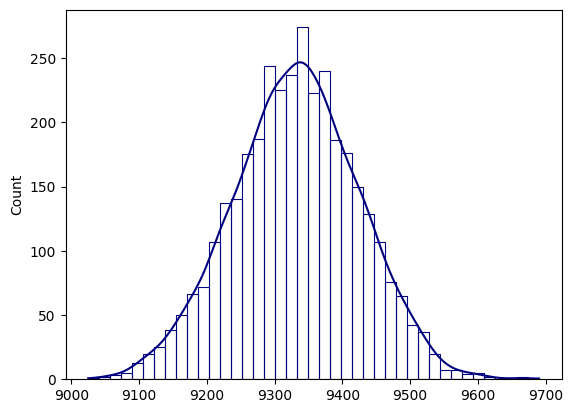

In [766]:
walmart_36_45_3000 = [walmart_36_45.sample(3000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_36_45_3000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group[36-45],n=3,000 is: {np.mean(walmart_36_45_3000)}")
print(f"Standard deviation for Age Group[36-45], n=3,000 is: {np.std(walmart_36_45_3000)}")

# **CI (95%) for Age Group [36-45], n=3,000**

In [767]:
walmart_36_45_3000_CI= norm.interval(.95,np.mean(walmart_36_45_3000),np.std(walmart_36_45_3000)/np.sqrt(3000))
walmart_36_45_3000_CI

(np.float64(9328.636917684877), np.float64(9335.260207457979))

#**Sample Mean for Age Group [36-45], n= 30,000**



Sample Mean for Age Group [36-45],n=30,000 is: 9331.815154838096
Standard deviation for Age Group [36-45], n=30,000 is: 28.69186637500724


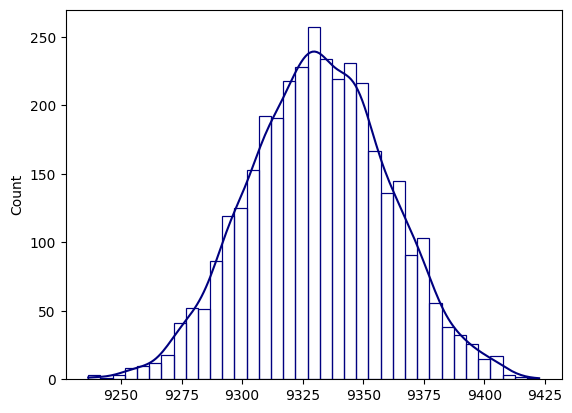

In [768]:
walmart_36_45_30000 = [walmart_36_45.sample(30000, replace= True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_36_45_30000, kde= True, fill= False, color='navy')
print(f"Sample Mean for Age Group [36-45],n=30,000 is: {np.mean(walmart_36_45_30000)}")
print(f"Standard deviation for Age Group [36-45], n=30,000 is: {np.std(walmart_36_45_30000)}")

# **CI (95%) for Age Group [36-45], n=30,000**

In [769]:
walmart_36_45_30000_CI= norm.interval(.95,np.mean(walmart_36_45_30000),np.std(walmart_36_45_30000)/np.sqrt(30000))
walmart_36_45_30000_CI

(np.float64(9331.490481771356), np.float64(9332.139827904835))

# **Age Group [46-50]**

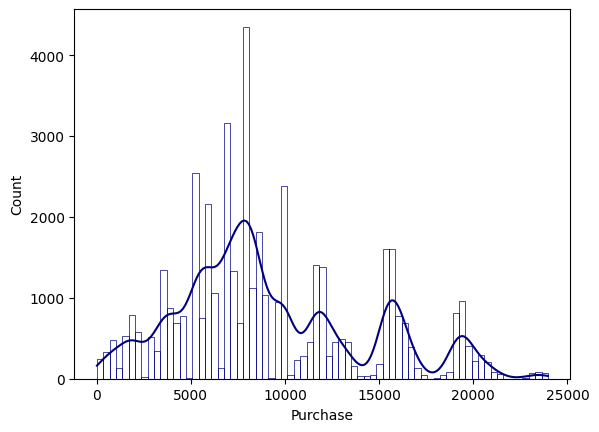

In [770]:
walmart_46_50 =walmart_age_data[walmart_age_data['Age']== '46-50']
walmart_46_50
sns.histplot(walmart_46_50, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [46-50]**

In [771]:
print(walmart_46_50.describe())
print(np.mean(walmart_46_50['Purchase']))

           Purchase
count  45701.000000
mean    9208.625697
std     4967.216367
min       12.000000
25%     5888.000000
50%     8036.000000
75%    11997.000000
max    23960.000000
9208.625697468327


# **CI for Age Group [46-50]**

In [772]:
walmart_46_50_CI= norm.interval(0.95,walmart_46_50['Purchase'].mean(),walmart_46_50['Purchase'].std()/np.sqrt(walmart_46_50['Purchase'].count()))
walmart_46_50_CI

(np.float64(9163.085142648752), np.float64(9254.166252287903))

# **Sample Mean for Age Group [46-50], n=300**

Sample Mean for Age Group[46-50], n=300 is: 9208.147622857143
Standard deviation for Age Group[46-50], n=300 is: 286.96158468517797


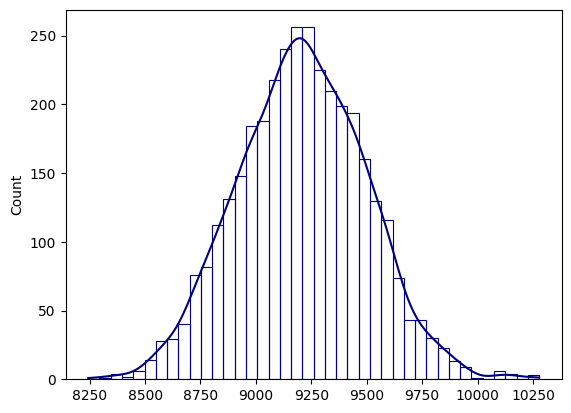

In [773]:
walmart_46_50_300 = [walmart_46_50.sample(300, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_46_50_300, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group[46-50], n=300 is: {np.mean(walmart_46_50_300)}")
print(f"Standard deviation for Age Group[46-50], n=300 is: {np.std(walmart_46_50_300)}")

# **CI (95%) for Age Group [46-50], n=300**

In [774]:
walmart_46_50_300_CI = norm.interval(0.95,np.mean(walmart_46_50_300),np.std(walmart_46_50_300) / np.sqrt(300))
walmart_46_50_300_CI

(np.float64(9175.675459311378), np.float64(9240.619786402907))

# **Sample Mean for Age Group [46-50], n=3,000**

Sample Mean for Age Group [46-50], n=3,000 is: 9209.005209333332
Standard deviation for Age Group [46-50], n=3,000 is: 92.09003764471936


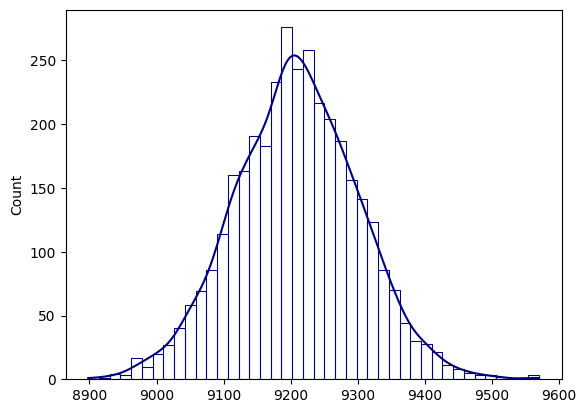

In [775]:
walmart_46_50_3000 = [walmart_46_50.sample(3000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_46_50_3000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [46-50], n=3,000 is: {np.mean(walmart_46_50_3000)}")
print(f"Standard deviation for Age Group [46-50], n=3,000 is: {np.std(walmart_46_50_3000)}")

# **CI (95%) for Age Group [46-50], n= 3,000**

In [776]:
walmart_46_50_3000_CI = norm.interval(0.95,np.mean(walmart_46_50_3000),np.std(walmart_46_50_3000) / np.sqrt(3000))
walmart_46_50_3000_CI

(np.float64(9205.70987021236), np.float64(9212.300548454305))

# **Sample Mean for Age Group [46-50], n=30,000**

Sample Mean for Age Group [46-50], n=30,000 is: 9208.026624276192
Standard deviation for Age Group [46-50], n=30,000 is: 28.803678119485706


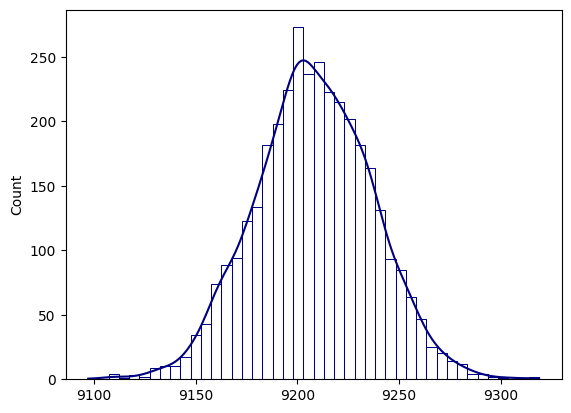

In [777]:
walmart_46_50_30000 = [walmart_46_50.sample(30000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_46_50_30000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [46-50], n=30,000 is: {np.mean(walmart_46_50_30000)}")
print(f"Standard deviation for Age Group [46-50], n=30,000 is: {np.std(walmart_46_50_30000)}")

# **CI (95%) for Age Group [46-50], n= 30,000**

In [778]:
walmart_46_50_30000_CI = norm.interval(0.95,np.mean(walmart_46_50_30000),np.std(walmart_46_50_30000) / np.sqrt(30000))
walmart_46_50_30000_CI

(np.float64(9207.700685963702), np.float64(9208.352562588681))

# **Age Group [51-55]**

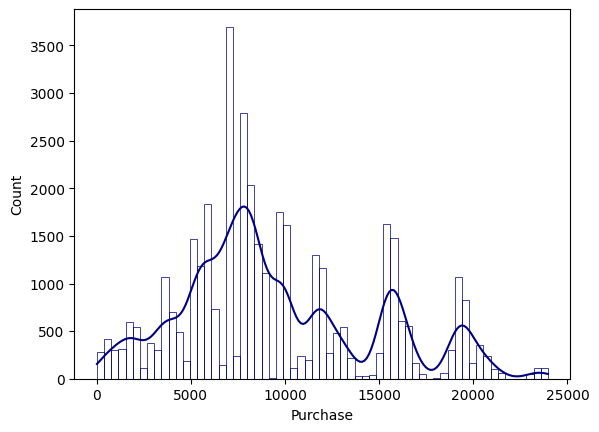

In [779]:
walmart_51_55 =walmart_age_data[walmart_age_data['Age']== '51-55']
walmart_51_55
sns.histplot(walmart_51_55, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [51-55]**

In [780]:
print(walmart_51_55.describe())
#print(np.mean(walmart_51_55['Purchase']))
pant= walmart_51_55.describe()
walmart_51_55['Purchase'].mean()

           Purchase
count  38501.000000
mean    9534.808031
std     5087.368080
min       12.000000
25%     6017.000000
50%     8130.000000
75%    12462.000000
max    23960.000000


np.float64(9534.808030960236)

# **CI for Age Group 51-55**


In [781]:
walmart_51_55_CI= norm.interval(0.95,walmart_51_55['Purchase'].mean(),walmart_51_55['Purchase'].std()/np.sqrt(walmart_51_55['Purchase'].count()))
walmart_51_55_CI

(np.float64(9483.991472776577), np.float64(9585.624589143894))

# **Sample Mean for Age Group [51-55], n=300**

Sample Mean for Age Group [51-55], n=300 is: 9527.152596190475
Standard deviation for Age Group [51-55], n=300 is: 287.82614931506686


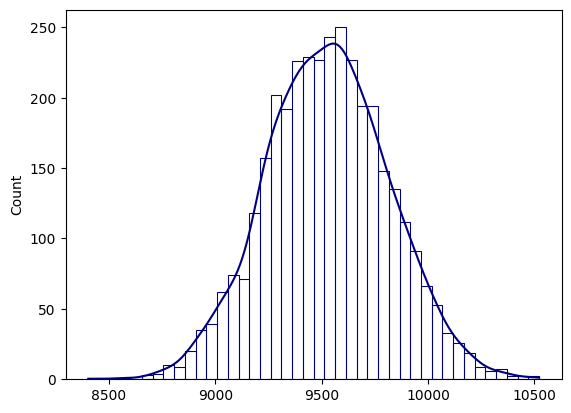

In [782]:
walmart_51_55_300 = [walmart_51_55.sample(300, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_51_55_300, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [51-55], n=300 is: {np.mean(walmart_51_55_300)}")
print(f"Standard deviation for Age Group [51-55], n=300 is: {np.std(walmart_51_55_300)}")

# **CI (95%) for Age Group [51-55], n=300**

In [783]:
walmart_51_55_300_CI = norm.interval(0.95,np.mean(walmart_51_55_300),np.std(walmart_51_55_300) / np.sqrt(300))
walmart_51_55_300_CI

(np.float64(9494.582599744575), np.float64(9559.722592636375))

# **Sample Mean for Age Group [51-55], n=3,000**

Sample Mean for Age Group [51-55], n=3,000 is: 9532.398714761905
Standard deviation for Age Group [51-55], n=3,000 is: 91.59113024669537


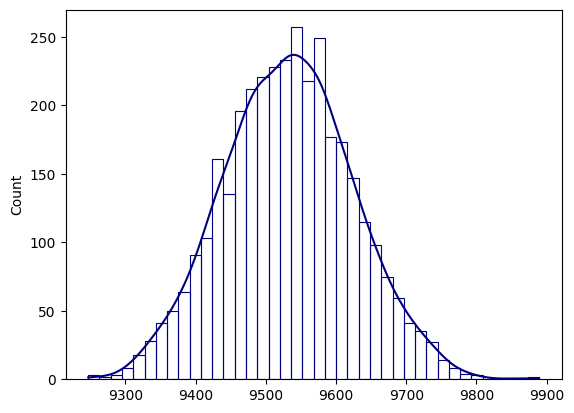

In [784]:
walmart_51_55_3000 = [walmart_51_55.sample(3000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_51_55_3000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [51-55], n=3,000 is: {np.mean(walmart_51_55_3000)}")
print(f"Standard deviation for Age Group [51-55], n=3,000 is: {np.std(walmart_51_55_3000)}")

# **CI (95%) for Age Group [51-55], n= 3,000**

In [785]:
walmart_51_55_3000_CI = norm.interval(0.95,np.mean(walmart_51_55_3000),np.std(walmart_51_55_3000) / np.sqrt(3000))
walmart_51_55_3000_CI

(np.float64(9529.121228484828), np.float64(9535.676201038981))

# **Sample Mean for Age Group [51-55], n=30,000**

Sample Mean for Age Group [51-55], n=30,000 is: 9535.794193771428
Standard deviation for Age Group [51-55], n=30,000 is: 29.616881790952156


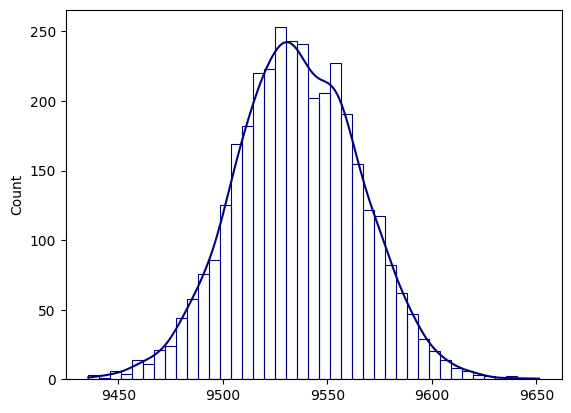

In [786]:
walmart_51_55_30000 = [walmart_51_55.sample(30000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_51_55_30000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [51-55], n=30,000 is: {np.mean(walmart_51_55_30000)}")
print(f"Standard deviation for Age Group [51-55], n=30,000 is: {np.std(walmart_51_55_30000)}")

# **CI (95%) for Age Group [51-55], n= 30,000**

In [787]:
walmart_51_55_30000_CI = norm.interval(0.95,np.mean(walmart_51_55_30000),np.std(walmart_51_55_30000) / np.sqrt(30000))
walmart_51_55_30000_CI

(np.float64(9535.459053362203), np.float64(9536.129334180652))

# **Age Group [55+]**

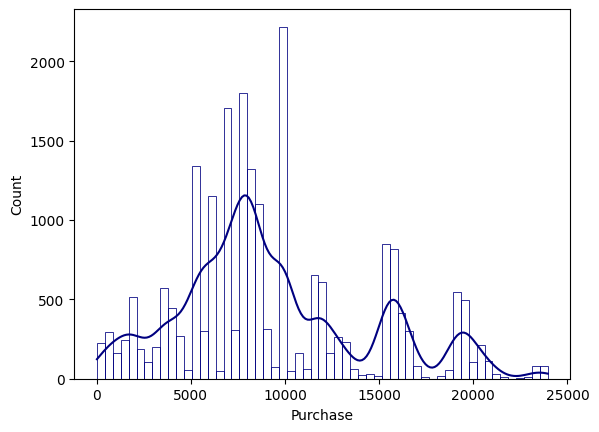

In [788]:
walmart_55plus= walmart_age_data[walmart_age_data['Age']== '55+']
walmart_55plus
sns.histplot(walmart_55plus, x='Purchase', color= 'navy', kde=True, fill= False)
plt.show()

# **Total Mean for Age Group [55+]**

In [789]:
print(walmart_55plus.describe())
print(np.mean(walmart_55plus['Purchase']))

           Purchase
count  21504.000000
mean    9336.280459
std     5011.493996
min       12.000000
25%     6018.000000
50%     8105.500000
75%    11932.000000
max    23960.000000
9336.280459449405


# **CI for Age Group 55+**

In [790]:
walmart_55plus_CI= norm.interval(0.95,walmart_55plus['Purchase'].mean(),walmart_55plus['Purchase'].std()/np.sqrt(walmart_55plus['Purchase'].count()))
walmart_55plus_CI

(np.float64(9269.29883441773), np.float64(9403.262084481079))

# **Sample Mean for Age Group [55+], n=300**

Sample Mean for Age Group [55+], n=300 is: 9341.362425714286
Standard deviation for Age Group [55+], n=300 is: 287.40727169294


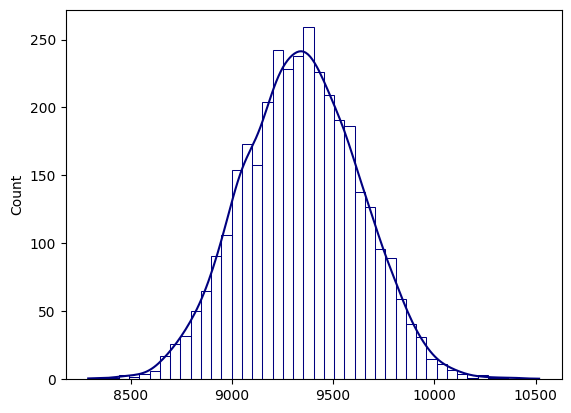

In [791]:
walmart_55plus_300 = [walmart_55plus.sample(300, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_55plus_300, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [55+], n=300 is: {np.mean(walmart_55plus_300)}")
print(f"Standard deviation for Age Group [55+], n=300 is: {np.std(walmart_55plus_300)}")

# **CI (95%) for Age Group [55+], n=300**

In [792]:
walmart_55plus_300_CI = norm.interval(0.95,np.mean(walmart_55plus_300),np.std(walmart_55plus_300) / np.sqrt(300))
walmart_55plus_300_CI

(np.float64(9308.839828862538), np.float64(9373.885022566034))

# **Sample Mean for Age Group [55+], n=3,000**

Sample Mean for Age Group [55+], n=3,000 is: 9339.922043904762
Standard deviation for Age Group [55+], n=3,000 is: 89.72596143469298


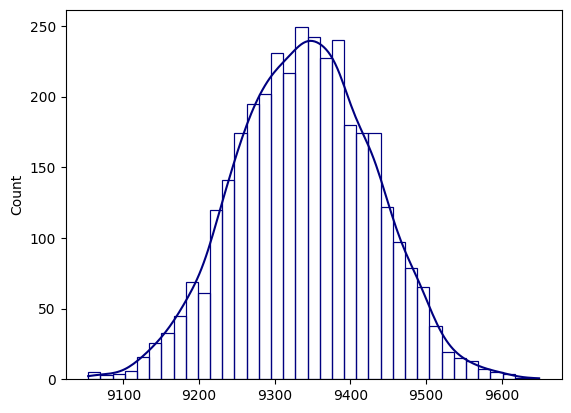

In [793]:
walmart_55plus_3000 = [walmart_55plus.sample(3000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_55plus_3000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [55+], n=3,000 is: {np.mean(walmart_55plus_3000)}")
print(f"Standard deviation for Age Group [55+], n=3,000 is: {np.std(walmart_55plus_3000)}")

# **CI (95%) for Age Group [55+], n= 3,000**

In [794]:
walmart_55plus_3000_CI = norm.interval(0.95,np.mean(walmart_55plus_3000),np.std(walmart_55plus_3000) / np.sqrt(3000))
walmart_55plus_3000_CI

(np.float64(9336.711300609995), np.float64(9343.132787199529))

# **Sample Mean for Age Group [55+], n=30,000**

Sample Mean for Age Group [55+], n=30,000 is: 9336.267688961905
Standard deviation for Age Group [55+], n=30,000 is: 29.562903258537013


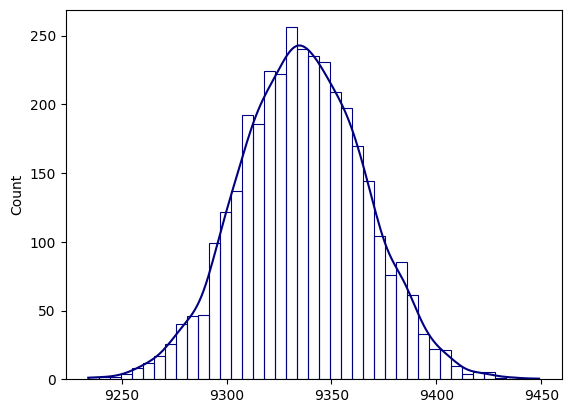

In [795]:
walmart_55plus_30000 = [walmart_55plus.sample(30000, replace=True)['Purchase'].mean() for i in range(3500)]
sns.histplot(walmart_55plus_30000, kde=True, fill=False, color='navy')
print(f"Sample Mean for Age Group [55+], n=30,000 is: {np.mean(walmart_55plus_30000)}")
print(f"Standard deviation for Age Group [55+], n=30,000 is: {np.std(walmart_55plus_30000)}")

# **CI (95%) for Age Group [55+], n= 30,000**

In [796]:
walmart_55plus_30000_CI = norm.interval(0.95,np.mean(walmart_55plus_30000),np.std(walmart_55plus_30000) / np.sqrt(30000))
walmart_55plus_30000_CI

(np.float64(9335.933159366054), np.float64(9336.602218557757))

# **AGE GROUP COMPARISON**

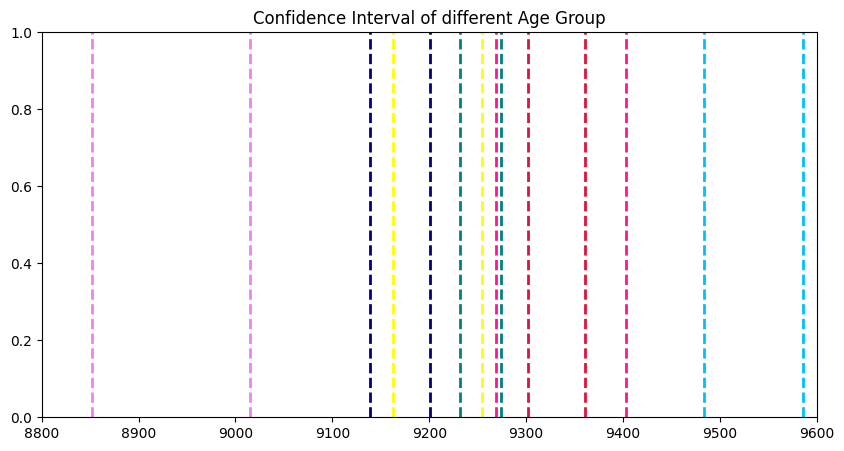

In [797]:
plt.figure(figsize=(10,5))
plt.title("Confidence Interval of different Age Group")

plt.axvline(x=walmart_0_17_CI[0], color='violet', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_0_17_CI[1], color='violet', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_18_25_CI[0], color='navy', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_18_25_CI[1], color='navy', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_26_35_CI[0], color='teal', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_26_35_CI[1], color='teal', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_36_45_CI[0], color='crimson', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_36_45_CI[1], color='crimson', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_46_50_CI[0], color='yellow', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_46_50_CI[1], color='yellow', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_51_55_CI[0], color='deepskyblue', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_51_55_CI[1], color='deepskyblue', linestyle='--', linewidth=2, label='Upper CI')

plt.axvline(x=walmart_55plus_CI[0], color='deeppink', linestyle='--', linewidth=2, label='Lower CI')
plt.axvline(x=walmart_55plus_CI[1], color='deeppink', linestyle='--', linewidth=2, label='Upper CI')


plt.xlim(8800, 9600)

plt.show()

All the confidence intervals for different age groups are separate and do not overlap much, which means the average purchase amount is different for each age group.

Each age group has its own range of values, showing that age has an effect on how much people spend.
Some age groups have wider intervals, meaning more variation in their spending.

Others have narrower intervals, showing more consistent purchase behavior.
This suggests that age is an important factor in understanding customer spending patterns.
The confidence intervals help us see how reliable the average purchase estimate is for each group.


# **REPORT**

The age, marital_status, purchase pattern suggests that younger single individuals (especially those aged 18–35) are the most active in terms of purchasing, while older age groups show a shift toward married individuals contributing more, though with fewer total purchases overall.

Product categories like Category 5 and Category 1 dominate in popularity, suggesting that these should be prioritized in inventory planning and promotional campaigns.
In older age groups, engage more with married invidual couple with value-based offers.

Marketing strategies should prioritize single males aged 18–35, as they represent the most valuable customer segment in terms of purchase volume. At the same time, targeted campaigns for married males in the 36–50 range could help maintain engagement with older, more stable buyers. Gender-specific promotions, especially for females in younger age groups, may also help boost participation from underrepresented segments.

Marketing efforts should also focus on the top-performing occupations—especially 4, 0, and 7—as they represent the most responsive customer segments. At the same time, there may be opportunities to explore why certain occupations show low engagement and whether targeted outreach or tailored offerings could help increase their participation
